# Exploratory Data Analysis

In [128]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import datetime
import warnings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings('ignore')


In [129]:
data = pd.read_csv("../../Data/paths_IP_08_20_CYF.csv") 


In [130]:
data = data.sort_values(['id']).reset_index(drop=True)

## Part 0. Data Preparation

### a. Data checking

In [131]:
pd.set_option('display.max_columns', len(data))
print(data.shape)
data.head()

(13974, 618)


,id,client_id,case_number,assign_id,new,new_3,as_recnum,as_date_opened,as_date_closed,as_date_prev,as_date_next,as_length_IP,as_gap_between_IP,as_pop,as_loc,as_unit,as_subunit,as_name,as_close,svc_pre_all,svc_pre,svc_pre_sub,svc_during,svc_post_sub,svc_post,svc_post_all,svc_op_7days_pre,svc_op_30days_pre,svc_op_60days_pre,svc_op_90days_pre,svc_es_7days_pre,svc_es_30days_pre,svc_es_60days_pre,svc_es_90days_pre,svc_ip_7days_pre,svc_ip_30days_pre,svc_ip_60days_pre,svc_ip_90days_pre,svc_dt_7days_pre,svc_dt_30days_pre,svc_dt_60days_pre,svc_dt_90days_pre,svc_op_7days_postdc,svc_op_30days_postdc,svc_op_60days_postdc,svc_op_90days_postdc,svc_es_7days_postdc,svc_es_30days_postdc,svc_es_60days_postdc,svc_es_90days_postdc,svc_ip_7days_postdc,svc_ip_30days_postdc,svc_ip_60days_postdc,svc_ip_90days_postdc,svc_dt_7days_postdc,svc_dt_30days_postdc,svc_dt_60days_postdc,svc_dt_90days_postdc,loc_pre_7days_ACT,loc_pre_30days_ACT,loc_pre_60days_ACT,loc_pre_90days_ACT,loc_pre_7days_CM,loc_pre_30days_CM,loc_pre_60days_CM,loc_pre_90days_CM,loc_pre_7days_CMINST,loc_pre_30days_CMINST,loc_pre_60days_CMINST,loc_pre_90days_CMINST,loc_pre_7days_CMSTR,loc_pre_30days_CMSTR,loc_pre_60days_CMSTR,loc_pre_90days_CMSTR,loc_pre_7days_CMTRAN,loc_pre_30days_CMTRAN,loc_pre_60days_CMTRAN,loc_pre_90days_CMTRAN,loc_pre_7days_WRAP,loc_pre_30days_WRAP,loc_pre_60days_WRAP,loc_pre_90days_WRAP,loc_pre_7days_TBS,loc_pre_30days_TBS,loc_pre_60days_TBS,loc_pre_90days_TBS,loc_pre_7days_FFS,loc_pre_30days_FFS,loc_pre_60days_FFS,loc_pre_90days_FFS,loc_pre_7days_OP,loc_pre_30days_OP,loc_pre_60days_OP,loc_pre_90days_OP,loc_pre_7days_OPLIHP,loc_pre_30days_OPLIHP,loc_pre_60days_OPLIHP,loc_pre_90days_OPLIHP,loc_pre_7days_OPR,loc_pre_30days_OPR,loc_pre_60days_OPR,loc_pre_90days_OPR,loc_pre_7days_PREV,loc_pre_30days_PREV,loc_pre_60days_PREV,loc_pre_90days_PREV,loc_pre_7days_CO,loc_pre_30days_CO,loc_pre_60days_CO,loc_pre_90days_CO,loc_pre_7days_CR,loc_pre_30days_CR,loc_pre_60days_CR,loc_pre_90days_CR,loc_pre_7days_CS,loc_pre_30days_CS,loc_pre_60days_CS,loc_pre_90days_CS,loc_pre_7days_ESU,loc_pre_30days_ESU,loc_pre_60days_ESU,loc_pre_90days_ESU,loc_pre_7days_PERT,loc_pre_30days_PERT,loc_pre_60days_PERT,loc_pre_90days_PERT,loc_pre_7days_UO,loc_pre_30days_UO,loc_pre_60days_UO,loc_pre_90days_UO,loc_pre_7days_IP,loc_pre_30days_IP,loc_pre_60days_IP,loc_pre_90days_IP,loc_pre_7days_IPCAPS,loc_pre_30days_IPCAPS,loc_pre_60days_IPCAPS,loc_pre_90days_IPCAPS,loc_pre_7days_IPCNTY,loc_pre_30days_IPCNTY,loc_pre_60days_IPCNTY,loc_pre_90days_IPCNTY,loc_pre_7days_IPFFS,loc_pre_30days_IPFFS,loc_pre_60days_IPFFS,loc_pre_90days_IPFFS,loc_pre_7days_IPLIHP,loc_pre_30days_IPLIHP,loc_pre_60days_IPLIHP,loc_pre_90days_IPLIHP,loc_pre_7days_IPST,loc_pre_30days_IPST,loc_pre_60days_IPST,loc_pre_90days_IPST,loc_pre_7days_JAIL,loc_pre_30days_JAIL,loc_pre_60days_JAIL,loc_pre_90days_JAIL,loc_pre_7days_JFS,loc_pre_30days_JFS,loc_pre_60days_JFS,loc_pre_90days_JFS,loc_pre_7days_EDG,loc_pre_30days_EDG,loc_pre_60days_EDG,loc_pre_90days_EDG,loc_pre_7days_LTC,loc_pre_30days_LTC,loc_pre_60days_LTC,loc_pre_90days_LTC,loc_pre_7days_LTCINST,loc_pre_30days_LTCINST,loc_pre_60days_LTCINST,loc_pre_90days_LTCINST,loc_pre_7days_LTCRES,loc_pre_30days_LTCRES,loc_pre_60days_LTCRES,loc_pre_90days_LTCRES,loc_pre_7days_RES,loc_pre_30days_RES,loc_pre_60days_RES,loc_pre_90days_RES,loc_pre_7days_BHC,loc_pre_30days_BHC,loc_pre_60days_BHC,loc_pre_90days_BHC,loc_pre_7days_DTC,loc_pre_30days_DTC,loc_pre_60days_DTC,loc_pre_90days_DTC,loc_pre_7days_DTCTF,loc_pre_30days_DTCTF,loc_pre_60days_DTCTF,loc_pre_90days_DTCTF,loc_pre_7days_DTR,loc_pre_30days_DTR,loc_pre_60days_DTR,loc_pre_90days_DTR,loc_pre_7days_STRTP,loc_pre_30days_STRTP,loc_pre_60days_STRTP,loc_pre_90days_STRTP,loc_post_7days_ACT,loc_post_30days_ACT,loc_post_60days_ACT,loc_post_90days_ACT,loc_post_7days_CM,loc_post_30days_CM,loc_post_60days_CM,loc_post_90days_CM,loc_post_7days_CMINST,loc_post_30days_CMINST,loc_post_60days_CMINST,loc_post_90days_CMINST,loc_post_7days_CMSTR,loc_post_30days_CMSTR,l

In [132]:
# Check overall data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13974 entries, 0 to 13973
Columns: 618 entries, id to ed
dtypes: float64(56), int64(410), object(152)
memory usage: 65.9+ MB


In [133]:
# Check data type
var_name = list(data.columns.values)
type_name = list(data.dtypes)
var_list = pd.DataFrame(
    {'variable_name': var_name,
     'data_type': type_name
    })

In [134]:
pd.set_option('display.max_rows', None)
print(var_list)

                   variable_name data_type
0                             id     int64
1                      client_id     int64
2                    case_number     int64
3                      assign_id     int64
4                            new     int64
5                          new_3     int64
6                      as_recnum     int64
7                 as_date_opened    object
8                 as_date_closed    object
9                   as_date_prev    object
10                  as_date_next    object
11                  as_length_IP     int64
12             as_gap_between_IP   float64
13                        as_pop    object
14                        as_loc    object
15                       as_unit     int64
16                    as_subunit     int64
17                       as_name    object
18                      as_close    object
19                   svc_pre_all     int64
20                       svc_pre     int64
21                   svc_pre_sub     int64
22         

In [135]:
# Convert date column to date type
date_cols = ['as_date_opened', 'as_date_closed', 'as_date_next', 'as_date_prev']
for i in date_cols:
    data[i] = pd.to_datetime(data[i])

In [136]:
# Change some columns to category data type
cols = ['as_pop', 'as_loc', 'as_close',
       'age_group','gender','race','lang','dx_group','substance','insurance','liv', 'sexorient', 'pcp', 'trauma', 'ADS', 'JJ', 'CWS', 'speced', 'ed']
data[cols] = data[cols].astype('category')

In [137]:
# Check the data type again
var_name = list(data.columns.values)
type_name = list(data.dtypes)
var_list = pd.DataFrame(
    {'variable_name': var_name,
     'data_type': type_name
    })
pd.set_option('display.max_rows', None)
print(var_list)

                   variable_name       data_type
0                             id           int64
1                      client_id           int64
2                    case_number           int64
3                      assign_id           int64
4                            new           int64
5                          new_3           int64
6                      as_recnum           int64
7                 as_date_opened  datetime64[ns]
8                 as_date_closed  datetime64[ns]
9                   as_date_prev  datetime64[ns]
10                  as_date_next  datetime64[ns]
11                  as_length_IP           int64
12             as_gap_between_IP         float64
13                        as_pop        category
14                        as_loc        category
15                       as_unit           int64
16                    as_subunit           int64
17                       as_name          object
18                      as_close        category
19                  

### b. Data Wrangling

In [138]:
# Correct the as_gap_between_IP column (if it is negative, convert it to 0)
data['as_gap_between_IP'] = data.as_gap_between_IP.clip(lower=0)

In [139]:
# Create the gap between index IP and former IP
data['as_gap_since_former_IP'] = data.as_date_opened - data.as_date_prev
data['as_gap_since_former_IP']=data['as_gap_since_former_IP']/np.timedelta64(1,'D')

In [164]:
# hospitalization history (how many IPs before the current IP index)
data = data.sort_values(by='id')
data['IP_history'] = data.groupby('client_id')['assign_id'].rank(method="first", ascending=True)
data['IP_history'] = data['IP_history'] - 1

In [140]:
# Recode some variables

# recode race
data['race'] = data['race'].replace([' '],'Unknown')
data['race'].fillna("Unknown/NR", inplace = True)

# recode language
data['lang'] = data['lang'].replace(['Other Asian','Vietnamese', 'Tagalog', 'Asian/PI'],'Asian languages')
data['lang'] = data['lang'].replace(['Arabic','Farsi', 'Other Middle Eastern', 'Middle Eastern'],'Middle Eastern languages')
#data['lang'].fillna("Other/Unknown", inplace = True)


# recode dx group
data['dx_group'] = data['dx_group'].replace('Invalid', np.NaN)
data['dx_group'] = data['dx_group'].replace(['Other','Excluded'],'Other/ Excluded')
data['dx_group'] = data['dx_group'].replace(['Adjustment Disorders', 'PTSD/Acute Stress'],'Stressor and Adjustment Disorders')

# recode sexual orientation
data['sexorient'] = data['sexorient'].replace([0],'Heterosexual')
data['sexorient'] = data['sexorient'].replace([1],'LGBTQ')
data['sexorient'] = data['sexorient'].replace([8],'NA')

# recode pcp
data['as_close'] = data['as_close'].replace(['Do Not Use / Auto\r\nClosed',' Unplanned, AMA or\r\nUnknown'],'Unknown')
data['as_close'] = data['as_close'].replace(['Jail','Incarcerated', 'Per Court Order'],'Justice Involved')
data['as_close'] = data['as_close'].replace(['Board & Care'],'Home/Shelter/Self')
data['as_close'] = data['as_close'].replace(['Medical Hospital', 'Transfer Medical Hospital'],'Medical Hospital')



In [141]:
# Create function for fiscal year column
def unix_stamp(date):
    return  datetime.datetime.strptime(date,"%Y/%m/%d")

def unix_stamp2(date):
    return  datetime.datetime.strptime(date,"%Y-%m-%d %H:%M:%S")

def fiscal_year(x):
    if unix_stamp('2008/07/01') <= unix_stamp2(str(x)) <= unix_stamp('2009/06/30'):
        return 'FY 2008-2009'
    elif unix_stamp('2009/07/01') <= unix_stamp2(str(x)) <= unix_stamp('2010/06/30'):
        return 'FY 2009-2010'
    elif unix_stamp('2010/07/01') <= unix_stamp2(str(x)) <= unix_stamp('2011/06/30'):
        return 'FY 2010-2011'
    elif unix_stamp('2011/07/01') <= unix_stamp2(str(x)) <= unix_stamp('2012/06/30'):
        return 'FY 2011-2012'
    elif unix_stamp('2012/07/01') <= unix_stamp2(str(x)) <= unix_stamp('2013/06/30'):
        return 'FY 2012-2013'
    elif unix_stamp('2013/07/01') <= unix_stamp2(str(x)) <= unix_stamp('2014/06/30'):
        return 'FY 2013-2014'
    elif unix_stamp('2014/07/01') <= unix_stamp2(str(x)) <= unix_stamp('2015/06/30'):
        return 'FY 2014-2015'
    elif unix_stamp('2015/07/01') <= unix_stamp2(str(x)) <= unix_stamp('2016/06/30'):
        return 'FY 2015-2016'
    elif unix_stamp('2016/07/01') <= unix_stamp2(str(x)) <= unix_stamp('2017/06/30'):
        return 'FY 2016-2017'
    elif unix_stamp('2017/07/01') <= unix_stamp2(str(x)) <= unix_stamp('2018/06/30'):
        return 'FY 2017-2018'
    elif unix_stamp('2018/07/01') <= unix_stamp2(str(x)) <= unix_stamp('2019/06/30'):
        return 'FY 2018-2019'
    elif unix_stamp('2019/07/01') <= unix_stamp2(str(x)) <= unix_stamp('2020/06/30'):
        return 'FY 2019-2020'
    else:
        return 'fail'

# Create fiscal year column
data['fiscal_year'] = data['as_date_opened'].apply(fiscal_year)



In [142]:
# Excluding cases that have date_opened before FY2008-2009
data = data.query('fiscal_year != "fail"') 

In [143]:
# Check how many missing data in each variable
data.isnull().sum()/len(data)*100

id                               0.000000
client_id                        0.000000
case_number                      0.000000
assign_id                        0.000000
new                              0.000000
new_3                            0.000000
as_recnum                        0.000000
as_date_opened                   0.000000
as_date_closed                   0.000000
as_date_prev                    45.315967
as_date_next                    45.323123
as_length_IP                     0.000000
as_gap_between_IP               45.323123
as_pop                           0.000000
as_loc                           0.000000
as_unit                          0.000000
as_subunit                       0.000000
as_name                          0.000000
as_close                         0.000000
svc_pre_all                      0.000000
svc_pre                          0.000000
svc_pre_sub                      0.000000
svc_during                       0.000000
svc_post_sub                     0

In [144]:
total_unique_client = data.client_id.unique().shape[0]
print('Number of distinct client: ', total_unique_client)

Number of distinct client:  6333


In [145]:
total_unique_IP = data.assign_id.unique().shape[0]
print('Number of distinct inpatient: ', total_unique_IP)

Number of distinct inpatient:  13973


## Part 1 - Demographics

FY 2016-2017    644
FY 2013-2014    635
FY 2019-2020    628
FY 2014-2015    595
FY 2015-2016    539
FY 2018-2019    539
FY 2012-2013    530
FY 2017-2018    496
FY 2010-2011    478
FY 2011-2012    465
FY 2009-2010    426
FY 2008-2009    358
Name: fiscal_year, dtype: int64
FY 2016-2017    10.168956
FY 2013-2014    10.026844
FY 2019-2020     9.916311
FY 2014-2015     9.395231
FY 2015-2016     8.510974
FY 2018-2019     8.510974
FY 2012-2013     8.368862
FY 2017-2018     7.831991
FY 2010-2011     7.547766
FY 2011-2012     7.342492
FY 2009-2010     6.726670
FY 2008-2009     5.652929
Name: fiscal_year, dtype: float64


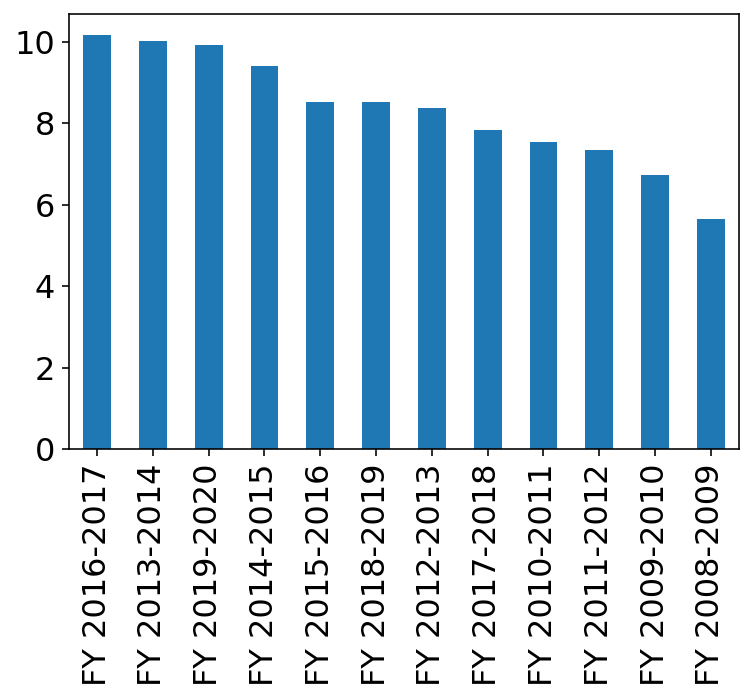

In [180]:
# fiscal year distribution
FY_dist = data[['client_id','fiscal_year']].groupby('client_id').max().fiscal_year.value_counts()
FY_dist_perc = data[['client_id','fiscal_year']].groupby('client_id').max().fiscal_year.value_counts(normalize=True) * 100
print(FY_dist)
print(FY_dist_perc)
FY_dist_perc.plot.bar()

In [51]:
# age distribution
data[['client_id','age']].groupby('client_id').max().describe()

,age
count,6310.000000
mean,14.742314
std,2.353220
min,3.000000
25%,14.000000
50%,15.000000
75%,17.000000
max,26.000000


In [52]:
# age group distribution
age_group_dist = data[['client_id','age_group']].groupby('client_id').max().age_group.value_counts()
age_group_dist_perc = data[['client_id','age_group']].groupby('client_id').max().age_group.value_counts(normalize=True) * 100
print(age_group_dist)
print(age_group_dist_perc)

Age 16-17    2830
Age 12-15    2691
Age 6-11      721
Age 18-25      57
Age 0-5        11
Name: age_group, dtype: int64
Age 16-17    44.849445
Age 12-15    42.646593
Age 6-11     11.426307
Age 18-25     0.903328
Age 0-5       0.174326
Name: age_group, dtype: float64


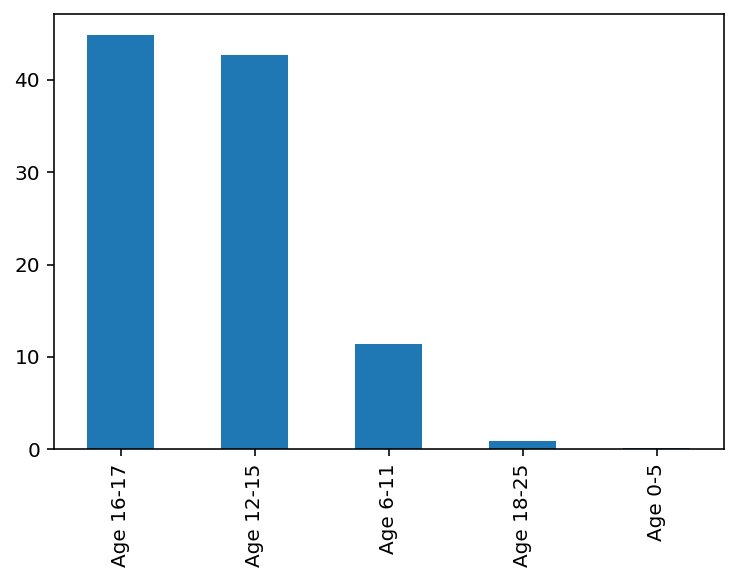

In [53]:
age_group_dist_perc.plot.bar()

Female           3741
Male             2432
Other/Unknown       6
Name: gender, dtype: int64
Female           60.543777
Male             39.359120
Other/Unknown     0.097103
Name: gender, dtype: float64


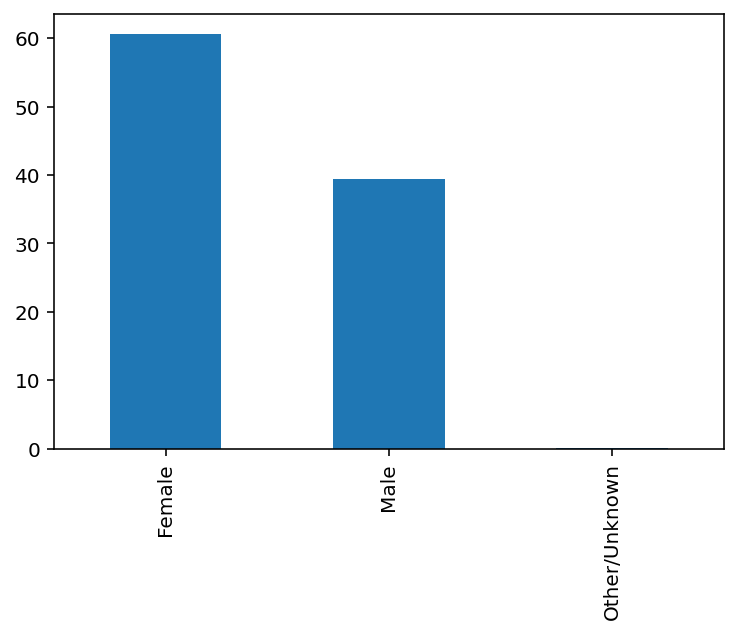

In [65]:
# gender distribution
gender_dist = data[['client_id','gender']].groupby('client_id').max().gender.value_counts()
gender_dist_perc = data[['client_id','gender']].groupby('client_id').max().gender.value_counts(normalize=True) * 100
print(gender_dist)
print(gender_dist_perc)
gender_dist_perc.plot.bar()

English                     5400
Spanish                      602
Other/Unknown                117
Middle Eastern languages      30
Asian languages               30
Name: lang, dtype: int64
English                     87.392782
Spanish                      9.742677
Other/Unknown                1.893510
Middle Eastern languages     0.485515
Asian languages              0.485515
Name: lang, dtype: float64


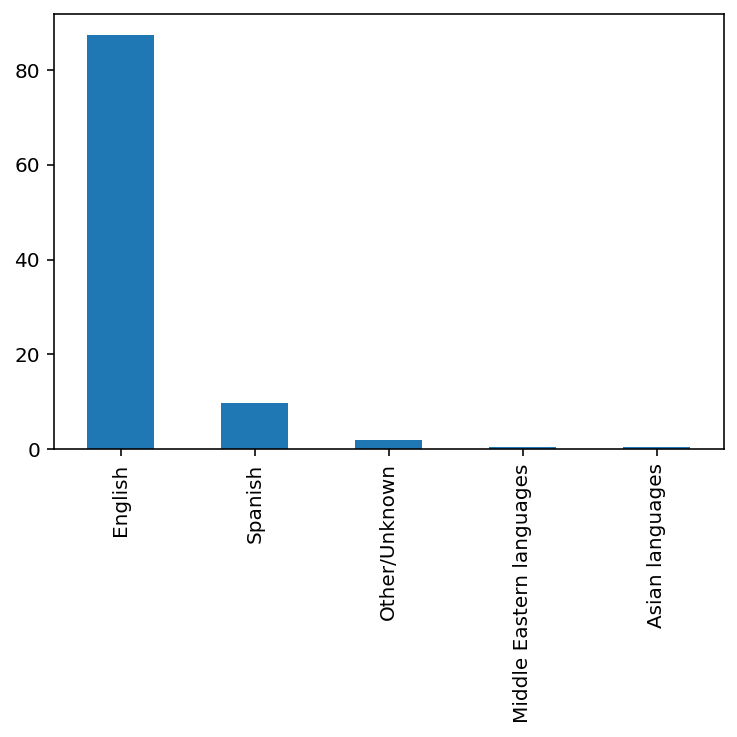

In [66]:
# language distribution
lang_dist = data[['client_id','lang']].groupby('client_id').max().lang.value_counts()
lang_dist_perc = data[['client_id','lang']].groupby('client_id').max().lang.value_counts(normalize=True) * 100
print(lang_dist)
print(lang_dist_perc)
lang_dist_perc.plot.bar()

Hispanic              3051
White                 1699
Black                  690
Unknown/NR             403
Asian/Pac Islander     241
Other                  199
Native American         50
Name: race, dtype: int64
Hispanic              48.176220
White                 26.827728
Black                 10.895310
Unknown/NR             6.363493
Asian/Pac Islander     3.805463
Other                  3.142271
Native American        0.789515
Name: race, dtype: float64


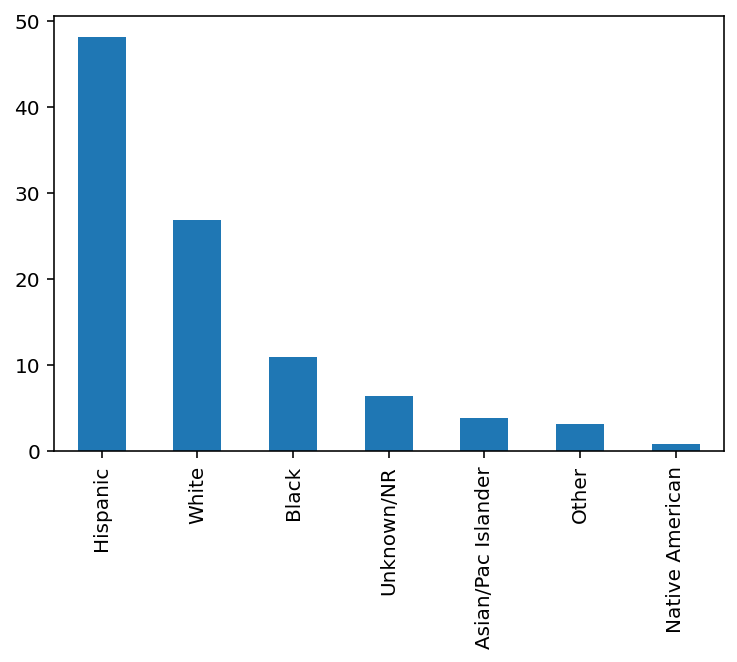

In [67]:
# race distribution
race_dist = data[['client_id','race']].groupby('client_id').max().race.value_counts()
race_dist_perc = data[['client_id','race']].groupby('client_id').max().race.value_counts(normalize=True) * 100
print(race_dist)
print(race_dist_perc)
race_dist_perc.plot.bar()

Depressive Disorders                 3258
Bipolar Disorders                     611
Oppositional/Conduct Disorders        540
Schizophrenic Disorders               450
Other/ Excluded                       320
Stressor and Adjustment Disorders     256
Anxiety Disorders                     248
ADHD                                  151
Name: dx_group, dtype: int64
Depressive Disorders                 55.845046
Bipolar Disorders                    10.473089
Oppositional/Conduct Disorders        9.256085
Schizophrenic Disorders               7.713404
Other/ Excluded                       5.485087
Stressor and Adjustment Disorders     4.388070
Anxiety Disorders                     4.250943
ADHD                                  2.588276
Name: dx_group, dtype: float64


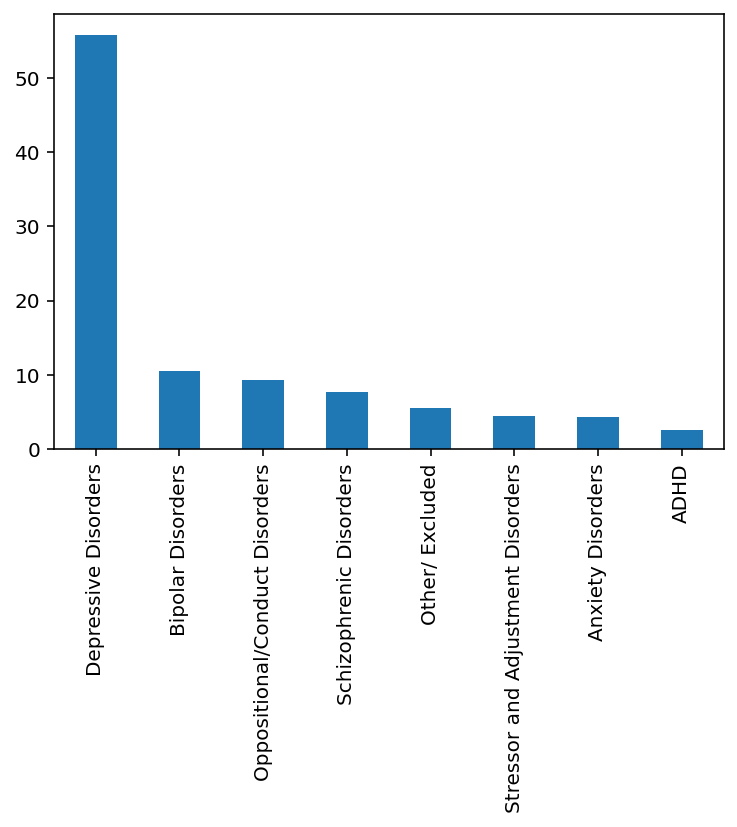

In [68]:
# diagnosis distribution
dx_group_dist = data[['client_id','dx_group']].groupby('client_id').max().dx_group.value_counts()
dx_group_dist_perc = data[['client_id','dx_group']].groupby('client_id').max().dx_group.value_counts(normalize=True) * 100
print(dx_group_dist)
print(dx_group_dist_perc)
dx_group_dist_perc.plot.bar()

0.0    5586
1.0     622
Name: substance, dtype: int64
0.0    89.98067
1.0    10.01933
Name: substance, dtype: float64


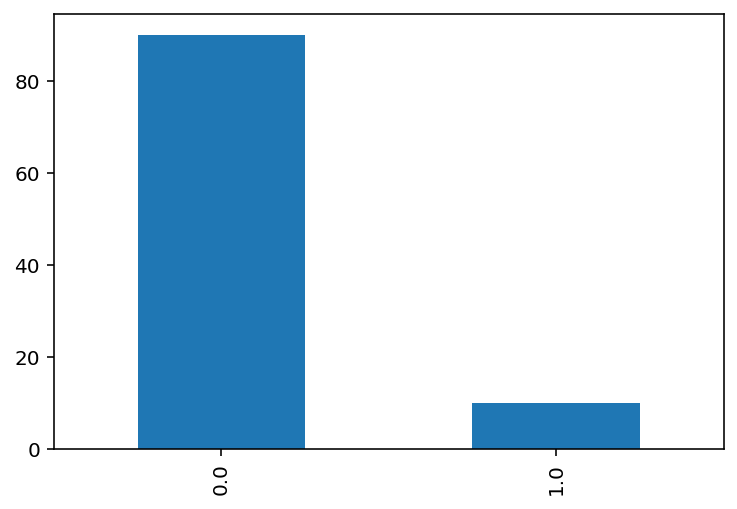

In [69]:
# substance abuse
sub_dist = data[['client_id','substance']].groupby('client_id').max().substance.value_counts()
sub_dist_perc = data[['client_id','substance']].groupby('client_id').max().substance.value_counts(normalize=True) * 100
print(sub_dist)
print(sub_dist_perc)
sub_dist_perc.plot.bar()

Medi-Cal Only            5293
Other Insurance           396
Uninsured/Unknown         256
Any Private Insurance     234
Name: insurance, dtype: int64
Medi-Cal Only            85.661110
Other Insurance           6.408804
Uninsured/Unknown         4.143065
Any Private Insurance     3.787021
Name: insurance, dtype: float64


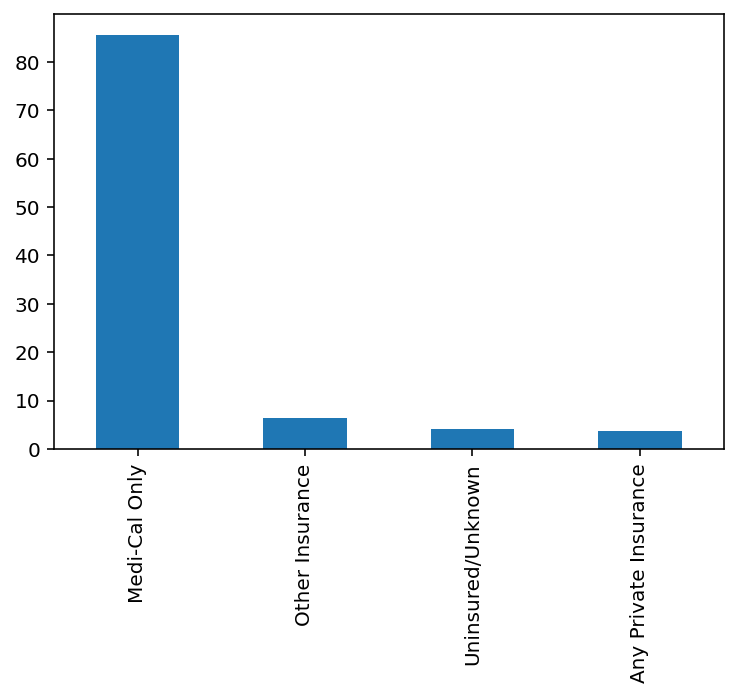

In [70]:
# insurance distribution
ins_dist = data[['client_id','insurance']].groupby('client_id').max().insurance.value_counts()
ins_dist_perc = data[['client_id','insurance']].groupby('client_id').max().insurance.value_counts(normalize=True) * 100
print(ins_dist)
print(ins_dist_perc)
ins_dist_perc.plot.bar()

Heterosexual    1445
LGBTQ            475
NA               266
Name: sexorient, dtype: int64
Heterosexual    66.102470
LGBTQ           21.729186
NA              12.168344
Name: sexorient, dtype: float64


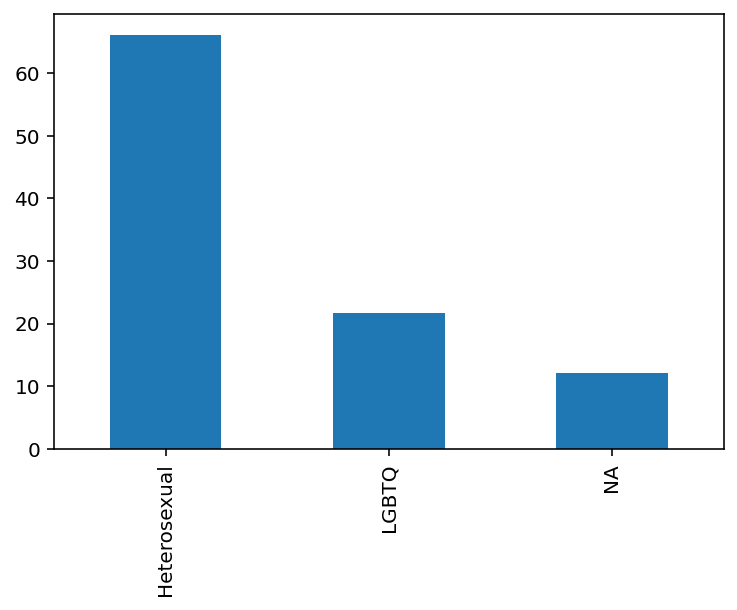

In [71]:
# lgbtq distribution
lgbtq_dist = data[['client_id','sexorient']].groupby('client_id').max().sexorient.value_counts()
lgbtq_dist_perc = data[['client_id','sexorient']].groupby('client_id').max().sexorient.value_counts(normalize=True) * 100
print(lgbtq_dist)
print(lgbtq_dist_perc)
lgbtq_dist_perc.plot.bar()

House or Apartment              5035
Group Home                       300
Residential Treatment Center     274
Correctional Facility            162
Other                            145
Foster Home                       76
Children Shelter                  68
Homeless                          67
Unknown                           52
Name: liv, dtype: int64
House or Apartment              81.485677
Group Home                       4.855155
Residential Treatment Center     4.434374
Correctional Facility            2.621783
Other                            2.346658
Foster Home                      1.229972
Children Shelter                 1.100502
Homeless                         1.084318
Unknown                          0.841560
Name: liv, dtype: float64


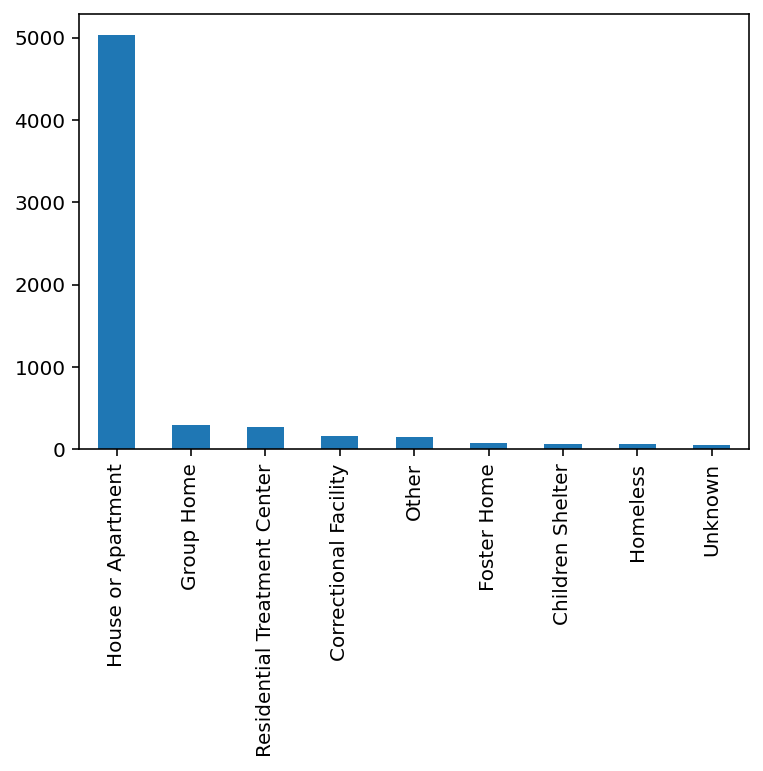

In [72]:
# living situation
living_dist = data[['client_id','liv']].groupby('client_id').max().liv.value_counts()
living_dist_perc = data[['client_id','liv']].groupby('client_id').max().liv.value_counts(normalize=True) * 100
print(living_dist)
print(living_dist_perc)
living_dist.plot.bar()

Satisfactorily Achieved\r\nGoals    2821
Home/Shelter/Self                   2589
Unknown                              481
Other                                367
Crisis Residence                      26
Required Lower Level\r\nof Care       16
Justice Involved                      13
Required Higher Level\r\nof Care       9
Against Medical Advice                 6
Medical Hospital                       3
Homeless                               2
Name: as_close, dtype: int64
Satisfactorily Achieved\r\nGoals    44.544450
Home/Shelter/Self                   40.881099
Unknown                              7.595137
Other                                5.795042
Crisis Residence                     0.410548
Required Lower Level\r\nof Care      0.252645
Justice Involved                     0.205274
Required Higher Level\r\nof Care     0.142113
Against Medical Advice               0.094742
Medical Hospital                     0.047371
Homeless                             0.031581
Name: as_close

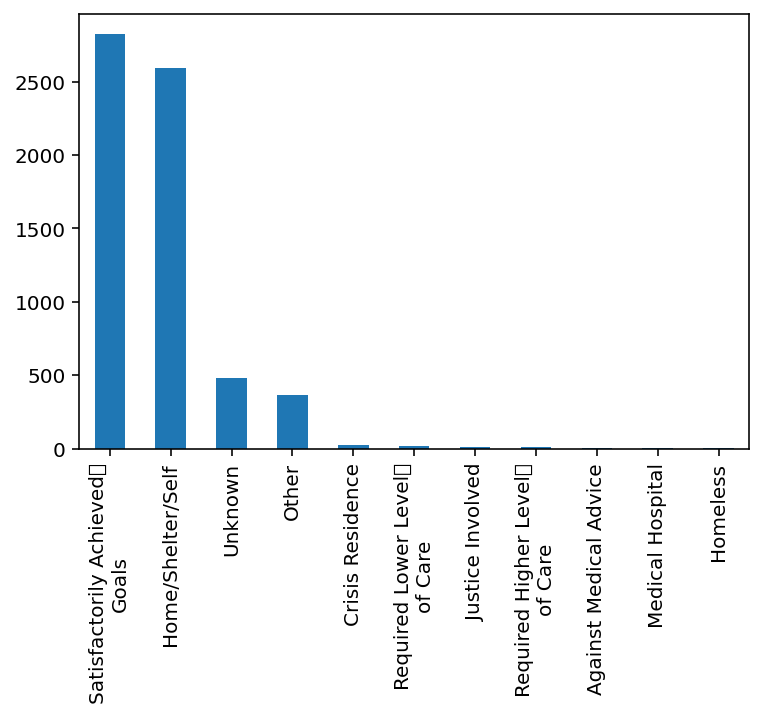

In [146]:
# discharge reason
discharge_dist = data[['client_id','as_close']].groupby('client_id').max().as_close.value_counts()
discharge_dist_perc = data[['client_id','as_close']].groupby('client_id').max().as_close.value_counts(normalize=True) * 100
print(discharge_dist)
print(discharge_dist_perc)
discharge_dist.plot.bar()

0.0    5812
1.0     396
Name: ADS, dtype: int64
0.0    93.621134
1.0     6.378866
Name: ADS, dtype: float64


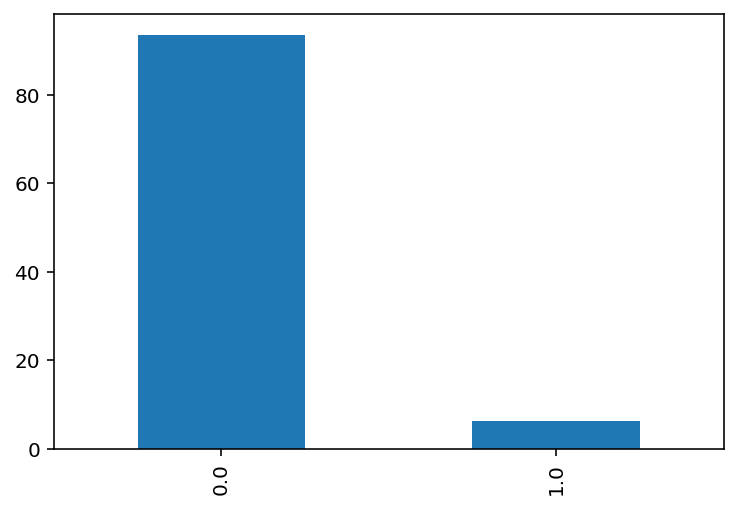

In [74]:
# ADS
ADS_dist = data[['client_id','ADS']].groupby('client_id').max().ADS.value_counts()
ADS_dist_perc = data[['client_id','ADS']].groupby('client_id').max().ADS.value_counts(normalize=True) * 100
print(ADS_dist)
print(ADS_dist_perc)
ADS_dist_perc.plot.bar()

0.0    5295
1.0     913
Name: CWS, dtype: int64
0.0    85.29317
1.0    14.70683
Name: CWS, dtype: float64


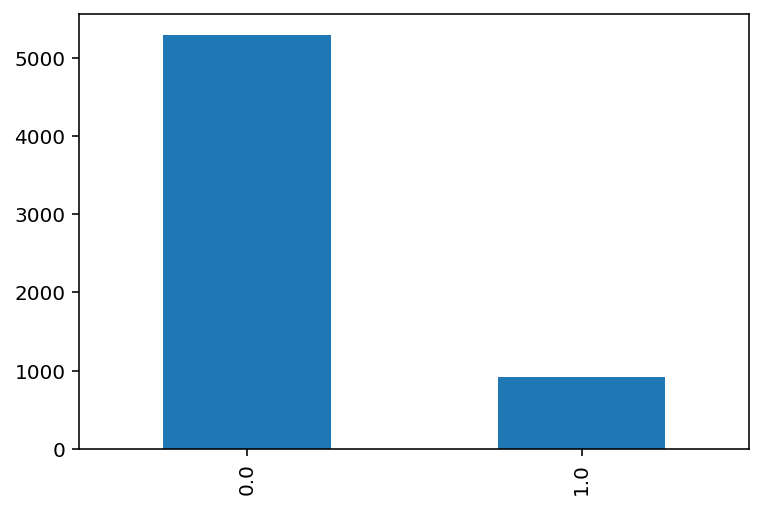

In [75]:
# CWS
CWS_dist = data[['client_id','CWS']].groupby('client_id').max().CWS.value_counts()
CWS_dist_perc = data[['client_id','CWS']].groupby('client_id').max().CWS.value_counts(normalize=True) * 100
print(CWS_dist)
print(CWS_dist_perc)
CWS_dist.plot.bar()

0.0    5669
1.0     539
Name: JJ, dtype: int64
0.0    91.317655
1.0     8.682345
Name: JJ, dtype: float64


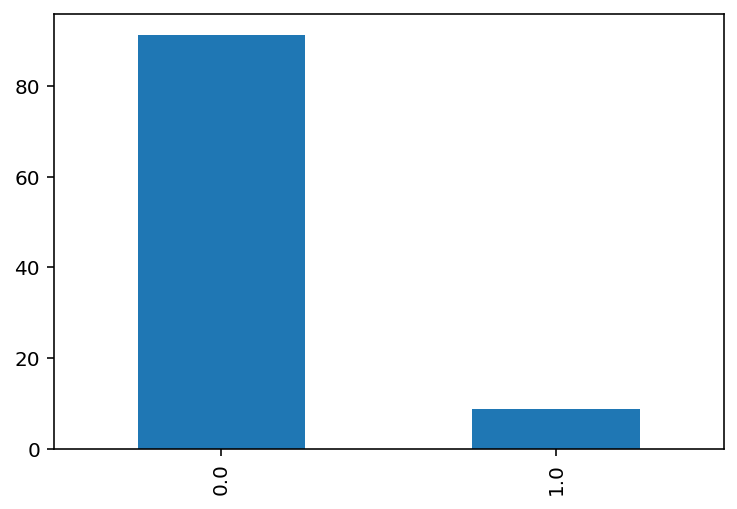

In [76]:
# JJ
JJ_dist = data[['client_id','JJ']].groupby('client_id').max().JJ.value_counts()
JJ_dist_perc = data[['client_id','JJ']].groupby('client_id').max().JJ.value_counts(normalize=True) * 100
print(JJ_dist)
print(JJ_dist_perc)
JJ_dist_perc.plot.bar()

0.0    4713
1.0    1495
Name: speced, dtype: int64
0.0    75.91817
1.0    24.08183
Name: speced, dtype: float64


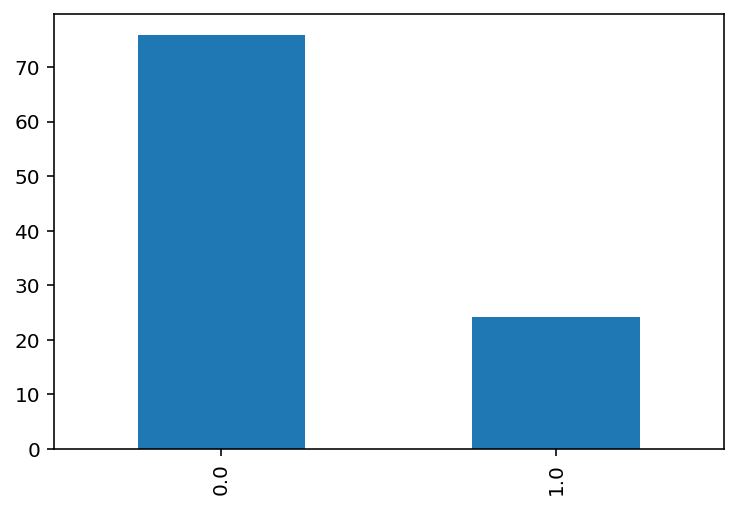

In [77]:
# SpecEd
SpecEd_dist = data[['client_id','speced']].groupby('client_id').max().speced.value_counts()
SpecEd_dist_perc = data[['client_id','speced']].groupby('client_id').max().speced.value_counts(normalize=True) * 100
print(SpecEd_dist)
print(SpecEd_dist_perc)
SpecEd_dist_perc.plot.bar()

0.0    5507
1.0     701
Name: ed, dtype: int64
0.0    88.708119
1.0    11.291881
Name: ed, dtype: float64


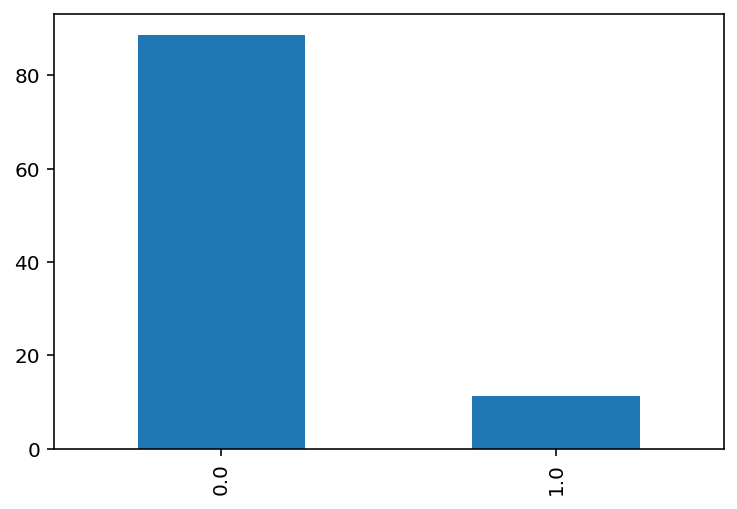

In [78]:
# Ed
Ed_dist = data[['client_id','ed']].groupby('client_id').max().ed.value_counts()
Ed_dist_perc = data[['client_id','ed']].groupby('client_id').max().ed.value_counts(normalize=True) * 100
print(Ed_dist)
print(Ed_dist_perc)
Ed_dist_perc.plot.bar()

1.0    2776
0.0     435
Name: trauma, dtype: int64
1.0    86.452818
0.0    13.547182
Name: trauma, dtype: float64


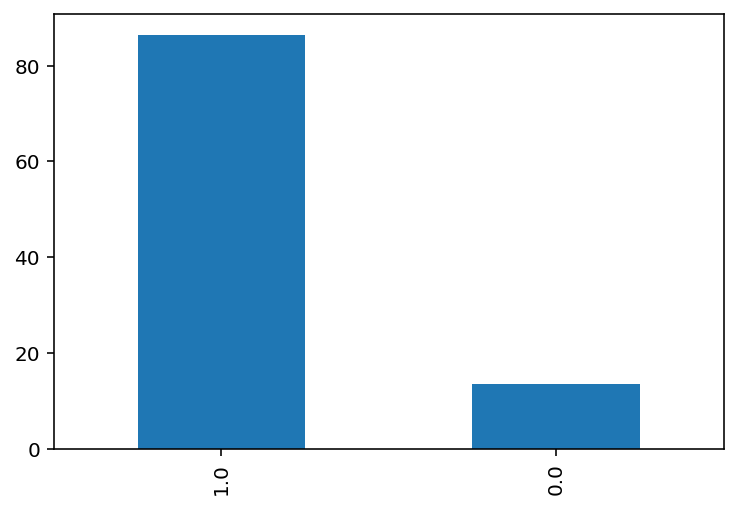

In [126]:
# trauma
trauma_dist = data[['client_id','trauma']].groupby('client_id').max().trauma.value_counts()
trauma_dist_perc = data[['client_id','trauma']].groupby('client_id').max().trauma.value_counts(normalize=True) * 100
print(trauma_dist)
print(trauma_dist_perc)
trauma_dist_perc.plot.bar()

1.0    3380
0.0     344
         78
Name: pcp, dtype: int64
1.0    88.900579
0.0     9.047870
        2.051552
Name: pcp, dtype: float64


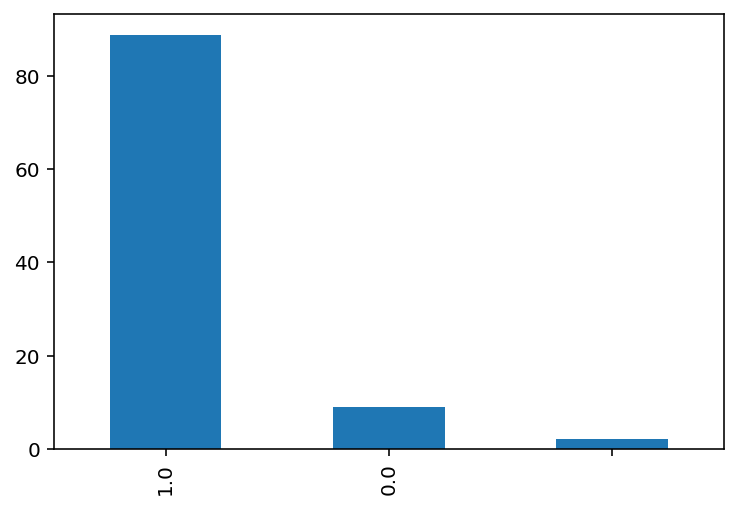

In [127]:
# pcp
pcp_dist = data[['client_id','pcp']].groupby('client_id').max().pcp.value_counts()
pcp_dist_perc = data[['client_id','pcp']].groupby('client_id').max().pcp.value_counts(normalize=True) * 100
print(pcp_dist)
print(pcp_dist_perc)
pcp_dist_perc.plot.bar()

## Part 2 - Level of care (LOC) by timepoints (7,30,60 and 90 days) summary

### A1. 7 days pre service and LOC

In [148]:
svc_op_7days_pre = data[['svc_op_7days_pre']].svc_op_7days_pre > 0
svc_op_7days_pre = svc_op_7days_pre.sum()
svc_op_7days_pre_perc = round(svc_op_7days_pre/total_unique_IP * 100, 1)
svc_op_7days_pre_visit = data[['svc_op_7days_pre']].svc_op_7days_pre.sum()
svc_op_7days_pre_client = data[['client_id','svc_op_7days_pre']].groupby('client_id').max().svc_op_7days_pre.value_counts()
svc_op_7days_pre_perc_user = round(svc_op_7days_pre_client[1]/total_unique_client*100,1)
svc_op_7days_pre_client_mean = round(svc_op_7days_pre_visit/svc_op_7days_pre_client[1],1)
print('svc_op_7days_pre')
print("Total cases that have at least 1 OP service:", svc_op_7days_pre)
print("% cases that have at least 1 OP service:", svc_op_7days_pre_perc)
print("Total visit:", svc_op_7days_pre_visit)
print("Total client:", svc_op_7days_pre_client[1])
print("Percent users:", svc_op_7days_pre_perc_user)
print("Mean visit among users:", svc_op_7days_pre_client_mean)


print('################################')
svc_es_7days_pre = data[['svc_es_7days_pre']].svc_es_7days_pre > 0
svc_es_7days_pre = svc_es_7days_pre.sum()
svc_es_7days_pre_perc = round(svc_es_7days_pre/total_unique_IP * 100, 1)
svc_es_7days_pre_visit = data[['svc_es_7days_pre']].svc_es_7days_pre.sum()
svc_es_7days_pre_client = data[['client_id','svc_es_7days_pre']].groupby('client_id').max().svc_es_7days_pre.value_counts()
svc_es_7days_pre_perc_user = round(svc_es_7days_pre_client[1]/total_unique_client*100,1)
svc_es_7days_pre_client_mean = round(svc_es_7days_pre_visit/svc_es_7days_pre_client[1],1)
print('svc_es_7days_pre')
print("Total cases that have at least 1 ES service:", svc_es_7days_pre)
print("% cases that have at least 1 ES service:", svc_es_7days_pre_perc)
print("Total visit:", svc_es_7days_pre_visit)
print("Total client:", svc_es_7days_pre_client[1])
print("Percent users:", svc_es_7days_pre_perc_user)
print("Mean visit among users:", svc_es_7days_pre_client_mean)

print('################################')
svc_ip_7days_pre = data[['svc_ip_7days_pre']].svc_ip_7days_pre > 0
svc_ip_7days_pre = svc_ip_7days_pre.sum()
svc_ip_7days_pre_perc = round(svc_ip_7days_pre/total_unique_IP * 100, 1)
svc_ip_7days_pre_visit = data[['svc_ip_7days_pre']].svc_ip_7days_pre.sum()
svc_ip_7days_pre_client = data[['client_id','svc_ip_7days_pre']].groupby('client_id').max().svc_ip_7days_pre.value_counts()
svc_ip_7days_pre_perc_user = round(svc_ip_7days_pre_client[1]/total_unique_client*100,1)
svc_ip_7days_pre_client_mean = round(svc_ip_7days_pre_visit/svc_ip_7days_pre_client[1],1)
print('svc_ip_7days_pre')
print("Total service:", svc_ip_7days_pre)
print("Total service %:", svc_ip_7days_pre_perc)
print("Total visit:", svc_ip_7days_pre_visit)
print("Total client:", svc_ip_7days_pre_client[1])
print("Percent users:", svc_ip_7days_pre_perc_user)
print("Mean visit among users:", svc_ip_7days_pre_client_mean)

print('################################')
svc_dt_7days_pre = data[['svc_dt_7days_pre']].svc_dt_7days_pre > 0
svc_dt_7days_pre = svc_dt_7days_pre.sum()
svc_dt_7days_pre_perc = round(svc_dt_7days_pre/total_unique_IP * 100, 1)
svc_dt_7days_pre_day = data[['svc_dt_7days_pre']].svc_dt_7days_pre.sum()
svc_dt_7days_pre_client = data[['client_id','svc_dt_7days_pre']].groupby('client_id').max().svc_dt_7days_pre.value_counts()
svc_dt_7days_pre_perc_user = round(svc_dt_7days_pre_client[1]/total_unique_client*100,1)
svc_dt_7days_pre_client_mean = round(svc_dt_7days_pre_day/svc_dt_7days_pre_client[1],1)
print('svc_dt_7days_pre')
print("Total cases that have at least 1 dt service:", svc_dt_7days_pre)
print("% cases that have at least 1 dt service:", svc_dt_7days_pre_perc)
print("Total days:", svc_dt_7days_pre_day)
print("Total client:", svc_dt_7days_pre_client[1])
print("Percent users:", svc_dt_7days_pre_perc_user)
print("Mean visit among users:", svc_dt_7days_pre_client_mean)


svc_op_7days_pre
Total cases that have at least 1 OP service: 5932
% cases that have at least 1 OP service: 42.5
Total visit: 23791
Total client: 632
Percent users: 10.0
Mean visit among users: 37.6
################################
svc_es_7days_pre
Total cases that have at least 1 ES service: 5650
% cases that have at least 1 ES service: 40.4
Total visit: 29639
Total client: 507
Percent users: 8.0
Mean visit among users: 58.5
################################
svc_ip_7days_pre
Total service: 13973
Total service %: 100.0
Total visit: 16957
Total client: 5319
Percent users: 84.0
Mean visit among users: 3.2
################################
svc_dt_7days_pre
Total cases that have at least 1 dt service: 1352
% cases that have at least 1 dt service: 9.7
Total days: 5464
Total client: 24
Percent users: 0.4
Mean visit among users: 227.7


### A2. 30 days pre service and LOC

In [149]:
svc_op_30days_pre = data[['svc_op_30days_pre']].svc_op_30days_pre > 0
svc_op_30days_pre = svc_op_30days_pre.sum()
svc_op_30days_pre_perc = round(svc_op_30days_pre/total_unique_IP * 100, 1)
svc_op_30days_pre_visit = data[['svc_op_30days_pre']].svc_op_30days_pre.sum()
svc_op_30days_pre_client = data[['client_id','svc_op_30days_pre']].groupby('client_id').max().svc_op_30days_pre.value_counts()
svc_op_30days_pre_perc_user = round(svc_op_30days_pre_client[1]/total_unique_client*100,1)
svc_op_30days_pre_client_mean = round(svc_op_30days_pre_visit/svc_op_30days_pre_client[1],1)
print('svc_op_30days_pre')
print("Total cases that have at least 1 OP service:", svc_op_30days_pre)
print("% cases that have at least 1 OP service:", svc_op_30days_pre_perc)
print("Total visit:", svc_op_30days_pre_visit)
print("Total client:", svc_op_30days_pre_client[1])
print("Percent users:", svc_op_30days_pre_perc_user)
print("Mean visit among users:", svc_op_30days_pre_client_mean)


print('################################')
svc_es_30days_pre = data[['svc_es_30days_pre']].svc_es_30days_pre > 0
svc_es_30days_pre = svc_es_30days_pre.sum()
svc_es_30days_pre_perc = round(svc_es_30days_pre/total_unique_IP * 100, 1)
svc_es_30days_pre_visit = data[['svc_es_30days_pre']].svc_es_30days_pre.sum()
svc_es_30days_pre_client = data[['client_id','svc_es_30days_pre']].groupby('client_id').max().svc_es_30days_pre.value_counts()
svc_es_30days_pre_perc_user = round(svc_es_30days_pre_client[1]/total_unique_client*100,1)
svc_es_30days_pre_client_mean = round(svc_es_30days_pre_visit/svc_es_30days_pre_client[1],1)
print('svc_es_30days_pre')
print("Total cases that have at least 1 ES service:", svc_es_30days_pre)
print("% cases that have at least 1 ES service:", svc_es_30days_pre_perc)
print("Total visit:", svc_es_30days_pre_visit)
print("Total client:", svc_es_30days_pre_client[1])
print("Percent users:", svc_es_30days_pre_perc_user)
print("Mean visit among users:", svc_es_30days_pre_client_mean)

print('################################')
svc_ip_30days_pre = data[['svc_ip_30days_pre']].svc_ip_30days_pre > 0
svc_ip_30days_pre = svc_ip_30days_pre.sum()
svc_ip_30days_pre_perc = round(svc_ip_30days_pre/total_unique_IP * 100, 1)
svc_ip_30days_pre_visit = data[['svc_ip_30days_pre']].svc_ip_30days_pre.sum()
svc_ip_30days_pre_client = data[['client_id','svc_ip_30days_pre']].groupby('client_id').max().svc_ip_30days_pre.value_counts()
svc_ip_30days_pre_perc_user = round(svc_ip_30days_pre_client[1]/total_unique_client*100,1)
svc_ip_30days_pre_client_mean = round(svc_ip_30days_pre_visit/svc_ip_30days_pre_client[1],1)
print('svc_ip_30days_pre')
print("Total service:", svc_ip_30days_pre)
print("Total service %:", svc_ip_30days_pre_perc)
print("Total visit:", svc_ip_30days_pre_visit)
print("Total client:", svc_ip_30days_pre_client[1])
print("Percent users:", svc_ip_30days_pre_perc_user)
print("Mean visit among users:", svc_ip_30days_pre_client_mean)

print('################################')
svc_dt_30days_pre = data[['svc_dt_30days_pre']].svc_dt_30days_pre > 0
svc_dt_30days_pre = svc_dt_30days_pre.sum()
svc_dt_30days_pre_perc = round(svc_dt_30days_pre/total_unique_IP * 100, 1)
svc_dt_30days_pre_day = data[['svc_dt_30days_pre']].svc_dt_30days_pre.sum()
svc_dt_30days_pre_client = data[['client_id','svc_dt_30days_pre']].groupby('client_id').max().svc_dt_30days_pre.value_counts()
svc_dt_30days_pre_perc_user = round(svc_dt_30days_pre_client[1]/total_unique_client*100,1)
svc_dt_30days_pre_client_mean = round(svc_dt_30days_pre_day/svc_dt_30days_pre_client[1],1)
print('svc_dt_30days_pre')
print("Total cases that have at least 1 dt service:", svc_dt_30days_pre)
print("% cases that have at least 1 dt service:", svc_dt_30days_pre_perc)
print("Total days:", svc_dt_30days_pre_day)
print("Total client:", svc_dt_30days_pre_client[1])
print("Percent users:", svc_dt_30days_pre_perc_user)
print("Mean visit among users:", svc_dt_30days_pre_client_mean)


svc_op_30days_pre
Total cases that have at least 1 OP service: 7371
% cases that have at least 1 OP service: 52.8
Total visit: 78133
Total client: 378
Percent users: 6.0
Mean visit among users: 206.7
################################
svc_es_30days_pre
Total cases that have at least 1 ES service: 6319
% cases that have at least 1 ES service: 45.2
Total visit: 39782
Total client: 498
Percent users: 7.9
Mean visit among users: 79.9
################################
svc_ip_30days_pre
Total service: 13973
Total service %: 100.0
Total visit: 20930
Total client: 4772
Percent users: 75.4
Mean visit among users: 4.4
################################
svc_dt_30days_pre
Total cases that have at least 1 dt service: 1645
% cases that have at least 1 dt service: 11.8
Total days: 24340
Total client: 12
Percent users: 0.2
Mean visit among users: 2028.3


### A3. 60 days pre service and LOC

In [150]:
svc_op_60days_pre = data[['svc_op_60days_pre']].svc_op_60days_pre > 0
svc_op_60days_pre = svc_op_60days_pre.sum()
svc_op_60days_pre_perc = round(svc_op_60days_pre/total_unique_IP * 100, 1)
svc_op_60days_pre_visit = data[['svc_op_60days_pre']].svc_op_60days_pre.sum()
svc_op_60days_pre_client = data[['client_id','svc_op_60days_pre']].groupby('client_id').max().svc_op_60days_pre.value_counts()
svc_op_60days_pre_perc_user = round(svc_op_60days_pre_client[1]/total_unique_client*100,1)
svc_op_60days_pre_client_mean = round(svc_op_60days_pre_visit/svc_op_60days_pre_client[1],1)
print('svc_op_60days_pre')
print("Total cases that have at least 1 OP service:", svc_op_60days_pre)
print("% cases that have at least 1 OP service:", svc_op_60days_pre_perc)
print("Total visit:", svc_op_60days_pre_visit)
print("Total client:", svc_op_60days_pre_client[1])
print("Percent users:", svc_op_60days_pre_perc_user)
print("Mean visit among users:", svc_op_60days_pre_client_mean)


print('################################')
svc_es_60days_pre = data[['svc_es_60days_pre']].svc_es_60days_pre > 0
svc_es_60days_pre = svc_es_60days_pre.sum()
svc_es_60days_pre_perc = round(svc_es_60days_pre/total_unique_IP * 100, 1)
svc_es_60days_pre_visit = data[['svc_es_60days_pre']].svc_es_60days_pre.sum()
svc_es_60days_pre_client = data[['client_id','svc_es_60days_pre']].groupby('client_id').max().svc_es_60days_pre.value_counts()
svc_es_60days_pre_perc_user = round(svc_es_60days_pre_client[1]/total_unique_client*100,1)
svc_es_60days_pre_client_mean = round(svc_es_60days_pre_visit/svc_es_60days_pre_client[1],1)
print('svc_es_60days_pre')
print("Total cases that have at least 1 ES service:", svc_es_60days_pre)
print("% cases that have at least 1 ES service:", svc_es_60days_pre_perc)
print("Total visit:", svc_es_60days_pre_visit)
print("Total client:", svc_es_60days_pre_client[1])
print("Percent users:", svc_es_60days_pre_perc_user)
print("Mean visit among users:", svc_es_60days_pre_client_mean)

print('################################')
svc_ip_60days_pre = data[['svc_ip_60days_pre']].svc_ip_60days_pre > 0
svc_ip_60days_pre = svc_ip_60days_pre.sum()
svc_ip_60days_pre_perc = round(svc_ip_60days_pre/total_unique_IP * 100, 1)
svc_ip_60days_pre_visit = data[['svc_ip_60days_pre']].svc_ip_60days_pre.sum()
svc_ip_60days_pre_client = data[['client_id','svc_ip_60days_pre']].groupby('client_id').max().svc_ip_60days_pre.value_counts()
svc_ip_60days_pre_perc_user = round(svc_ip_60days_pre_client[1]/total_unique_client*100,1)
svc_ip_60days_pre_client_mean = round(svc_ip_60days_pre_visit/svc_ip_60days_pre_client[1],1)
print('svc_ip_60days_pre')
print("Total service:", svc_ip_60days_pre)
print("Total service %:", svc_ip_60days_pre_perc)
print("Total visit:", svc_ip_60days_pre_visit)
print("Total client:", svc_ip_60days_pre_client[1])
print("Percent users:", svc_ip_60days_pre_perc_user)
print("Mean visit among users:", svc_ip_60days_pre_client_mean)

print('################################')
svc_dt_60days_pre = data[['svc_dt_60days_pre']].svc_dt_60days_pre > 0
svc_dt_60days_pre = svc_dt_60days_pre.sum()
svc_dt_60days_pre_perc = round(svc_dt_60days_pre/total_unique_IP * 100, 1)
svc_dt_60days_pre_day = data[['svc_dt_60days_pre']].svc_dt_60days_pre.sum()
svc_dt_60days_pre_client = data[['client_id','svc_dt_60days_pre']].groupby('client_id').max().svc_dt_60days_pre.value_counts()
svc_dt_60days_pre_perc_user = round(svc_dt_60days_pre_client[1]/total_unique_client*100,1)
svc_dt_60days_pre_client_mean = round(svc_dt_60days_pre_day/svc_dt_60days_pre_client[1],1)
print('svc_dt_60days_pre')
print("Total cases that have at least 1 dt service:", svc_dt_60days_pre)
print("% cases that have at least 1 dt service:", svc_dt_60days_pre_perc)
print("Total days:", svc_dt_60days_pre_day)
print("Total client:", svc_dt_60days_pre_client[1])
print("Percent users:", svc_dt_60days_pre_perc_user)
print("Mean visit among users:", svc_dt_60days_pre_client_mean)


svc_op_60days_pre
Total cases that have at least 1 OP service: 7884
% cases that have at least 1 OP service: 56.4
Total visit: 139142
Total client: 287
Percent users: 4.5
Mean visit among users: 484.8
################################
svc_es_60days_pre
Total cases that have at least 1 ES service: 6783
% cases that have at least 1 ES service: 48.5
Total visit: 49540
Total client: 483
Percent users: 7.6
Mean visit among users: 102.6
################################
svc_ip_60days_pre
Total service: 13973
Total service %: 100.0
Total visit: 24299
Total client: 4550
Percent users: 71.8
Mean visit among users: 5.3
################################
svc_dt_60days_pre
Total cases that have at least 1 dt service: 1775
% cases that have at least 1 dt service: 12.7
Total days: 49366
Total client: 7
Percent users: 0.1
Mean visit among users: 7052.3


### A4. 90 days pre service and LOC

In [151]:
svc_op_90days_pre = data[['svc_op_90days_pre']].svc_op_90days_pre > 0
svc_op_90days_pre = svc_op_90days_pre.sum()
svc_op_90days_pre_perc = round(svc_op_90days_pre/total_unique_IP * 100, 1)
svc_op_90days_pre_visit = data[['svc_op_90days_pre']].svc_op_90days_pre.sum()
svc_op_90days_pre_client = data[['client_id','svc_op_90days_pre']].groupby('client_id').max().svc_op_90days_pre.value_counts()
svc_op_90days_pre_perc_user = round(svc_op_90days_pre_client[1]/total_unique_client*100,1)
svc_op_90days_pre_client_mean = round(svc_op_90days_pre_visit/svc_op_90days_pre_client[1],1)
print('svc_op_90days_pre')
print("Total cases that have at least 1 OP service:", svc_op_90days_pre)
print("% cases that have at least 1 OP service:", svc_op_90days_pre_perc)
print("Total visit:", svc_op_90days_pre_visit)
print("Total client:", svc_op_90days_pre_client[1])
print("Percent users:", svc_op_90days_pre_perc_user)
print("Mean visit among users:", svc_op_90days_pre_client_mean)


print('################################')
svc_es_90days_pre = data[['svc_es_90days_pre']].svc_es_90days_pre > 0
svc_es_90days_pre = svc_es_90days_pre.sum()
svc_es_90days_pre_perc = round(svc_es_90days_pre/total_unique_IP * 100, 1)
svc_es_90days_pre_visit = data[['svc_es_90days_pre']].svc_es_90days_pre.sum()
svc_es_90days_pre_client = data[['client_id','svc_es_90days_pre']].groupby('client_id').max().svc_es_90days_pre.value_counts()
svc_es_90days_pre_perc_user = round(svc_es_90days_pre_client[1]/total_unique_client*100,1)
svc_es_90days_pre_client_mean = round(svc_es_90days_pre_visit/svc_es_90days_pre_client[1],1)
print('svc_es_90days_pre')
print("Total cases that have at least 1 ES service:", svc_es_90days_pre)
print("% cases that have at least 1 ES service:", svc_es_90days_pre_perc)
print("Total visit:", svc_es_90days_pre_visit)
print("Total client:", svc_es_90days_pre_client[1])
print("Percent users:", svc_es_90days_pre_perc_user)
print("Mean visit among users:", svc_es_90days_pre_client_mean)

print('################################')
svc_ip_90days_pre = data[['svc_ip_90days_pre']].svc_ip_90days_pre > 0
svc_ip_90days_pre = svc_ip_90days_pre.sum()
svc_ip_90days_pre_perc = round(svc_ip_90days_pre/total_unique_IP * 100, 1)
svc_ip_90days_pre_visit = data[['svc_ip_90days_pre']].svc_ip_90days_pre.sum()
svc_ip_90days_pre_client = data[['client_id','svc_ip_90days_pre']].groupby('client_id').max().svc_ip_90days_pre.value_counts()
svc_ip_90days_pre_perc_user = round(svc_ip_90days_pre_client[1]/total_unique_client*100,1)
svc_ip_90days_pre_client_mean = round(svc_ip_90days_pre_visit/svc_ip_90days_pre_client[1],1)
print('svc_ip_90days_pre')
print("Total service:", svc_ip_90days_pre)
print("Total service %:", svc_ip_90days_pre_perc)
print("Total visit:", svc_ip_90days_pre_visit)
print("Total client:", svc_ip_90days_pre_client[1])
print("Percent users:", svc_ip_90days_pre_perc_user)
print("Mean visit among users:", svc_ip_90days_pre_client_mean)

print('################################')
svc_dt_90days_pre = data[['svc_dt_90days_pre']].svc_dt_90days_pre > 0
svc_dt_90days_pre = svc_dt_90days_pre.sum()
svc_dt_90days_pre_perc = round(svc_dt_90days_pre/total_unique_IP * 100, 1)
svc_dt_90days_pre_day = data[['svc_dt_90days_pre']].svc_dt_90days_pre.sum()
svc_dt_90days_pre_client = data[['client_id','svc_dt_90days_pre']].groupby('client_id').max().svc_dt_90days_pre.value_counts()
svc_dt_90days_pre_perc_user = round(svc_dt_90days_pre_client[1]/total_unique_client*100,1)
svc_dt_90days_pre_client_mean = round(svc_dt_90days_pre_day/svc_dt_90days_pre_client[1],1)
print('svc_dt_90days_pre')
print("Total cases that have at least 1 dt service:", svc_dt_90days_pre)
print("% cases that have at least 1 dt service:", svc_dt_90days_pre_perc)
print("Total days:", svc_dt_90days_pre_day)
print("Total client:", svc_dt_90days_pre_client[1])
print("Percent users:", svc_dt_90days_pre_perc_user)
print("Mean visit among users:", svc_dt_90days_pre_client_mean)


svc_op_90days_pre
Total cases that have at least 1 OP service: 8248
% cases that have at least 1 OP service: 59.0
Total visit: 194033
Total client: 270
Percent users: 4.3
Mean visit among users: 718.6
################################
svc_es_90days_pre
Total cases that have at least 1 ES service: 7077
% cases that have at least 1 ES service: 50.6
Total visit: 57768
Total client: 470
Percent users: 7.4
Mean visit among users: 122.9
################################
svc_ip_90days_pre
Total service: 13973
Total service %: 100.0
Total visit: 26951
Total client: 4415
Percent users: 69.7
Mean visit among users: 6.1
################################
svc_dt_90days_pre
Total cases that have at least 1 dt service: 1877
% cases that have at least 1 dt service: 13.4
Total days: 72992
Total client: 9
Percent users: 0.1
Mean visit among users: 8110.2


## Part 3 - LOC by order

In [152]:
loc1_pre_perc = data.loc1_pre.value_counts(normalize=True)*100
loc2_pre_perc = data.loc2_pre.value_counts(normalize=True)*100
loc3_pre_perc = data.loc3_pre.value_counts(normalize=True)*100
loc4_pre_perc = data.loc4_pre.value_counts(normalize=True)*100
loc5_pre_perc = data.loc5_pre.value_counts(normalize=True)*100



In [153]:
pd.concat([loc1_pre_perc, loc2_pre_perc, loc3_pre_perc, loc4_pre_perc, loc5_pre_perc], axis=1)

,loc1_pre,loc2_pre,loc3_pre,loc4_pre,loc5_pre
OP,29.667038,26.763856,22.985710,18.305085,11.111111
CS,22.691090,15.953789,12.648221,9.265537,6.250000
FFS,8.927501,7.468024,9.577379,8.248588,5.555556
IP,8.448173,11.676523,5.594406,3.163842,2.083333
WRAP,6.316871,5.061202,6.172089,8.587571,9.722222
IPFFS,4.331079,7.990648,8.665248,11.638418,15.277778
TBS,4.185569,4.951176,6.536941,9.604520,8.333333
DTR,3.757597,3.919681,7.753116,8.700565,12.500000
DTC,2.456561,1.980470,3.314077,3.728814,6.944444
OPR,2.156980,3.795902,3.587717,6.214689,5.555556


## Part 4 - Total services

In [154]:
data[['client_id','svc_pre_all']].groupby('client_id').max().describe()

,svc_pre_all
count,6333.000000
mean,100.249803
std,212.735930
min,0.000000
25%,1.000000
50%,19.000000
75%,93.000000
max,2446.000000


In [155]:
data[['client_id','svc_pre']].groupby('client_id').max().describe()

,svc_pre
count,6333.000000
mean,72.150640
std,148.015883
min,0.000000
25%,1.000000
50%,17.000000
75%,75.000000
max,2325.000000


In [156]:
data[['client_id','svc_pre_sub']].groupby('client_id').max().describe()

,svc_pre_sub
count,6333.000000
mean,0.229591
std,0.421353
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2.000000


In [157]:
data[['client_id','svc_post_all']].groupby('client_id').max().describe()

,svc_post_all
count,6333.000000
mean,162.222170
std,279.612176
min,0.000000
25%,11.000000
50%,54.000000
75%,178.000000
max,2649.000000


In [158]:
data[['client_id','new']].groupby('client_id').max().new.value_counts(normalize=True) * 100

0    63.919154
1    36.080846
Name: new, dtype: float64

## Part 4 - Summary of hospitalization data

In [159]:
# IP type distribution
iploc_dist = data[['client_id','as_loc']].groupby('client_id').max().as_loc.value_counts()
iploc_dist_perc = data[['client_id','as_loc']].groupby('client_id').max().as_loc.value_counts(normalize=True) * 100
print(iploc_dist)
print(iploc_dist_perc)

IPFFS     3985
IPCAPS    1643
IP         692
PHF         13
Name: as_loc, dtype: int64
IPFFS     62.924364
IPCAPS    25.943471
IP        10.926891
PHF        0.205274
Name: as_loc, dtype: float64


In [160]:
# Gap from the previous IP to the current IP index
data[['client_id','as_gap_since_former_IP']].groupby('client_id').max().describe()

,as_gap_since_former_IP
count,2426.000000
mean,300.195796
std,391.910831
min,0.000000
25%,31.000000
50%,153.000000
75%,406.000000
max,4050.000000


In [161]:
# Psychiatric Inpatient Duration
data[['client_id','as_length_IP']].groupby('client_id').max().describe()

,as_length_IP
count,6333.000000
mean,6.575872
std,18.322507
min,0.000000
25%,3.000000
50%,4.000000
75%,7.000000
max,935.000000


In [162]:
# Days until the next IP
data[['client_id','as_gap_between_IP']].groupby('client_id').max().describe()

,as_gap_between_IP
count,2426.000000
mean,294.957543
std,391.732365
min,0.000000
25%,23.250000
50%,147.500000
75%,402.750000
max,4049.000000


In [165]:
# Hospitalization history: how many previous IP up to the current IP index
data[['client_id','IP_history']].groupby('client_id').max().describe()

,IP_history
count,6333.000000
mean,1.206379
std,2.927780
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,39.000000


In [166]:
# Calculate the gap day between IP within a year
readmission_data = data.as_gap_between_IP.tolist()
readmission_data = [x for x in readmission_data if ~np.isnan(x)]
readmission_data = filter(lambda readmission_data: readmission_data <= 365, readmission_data)
readmission_data=list(readmission_data)


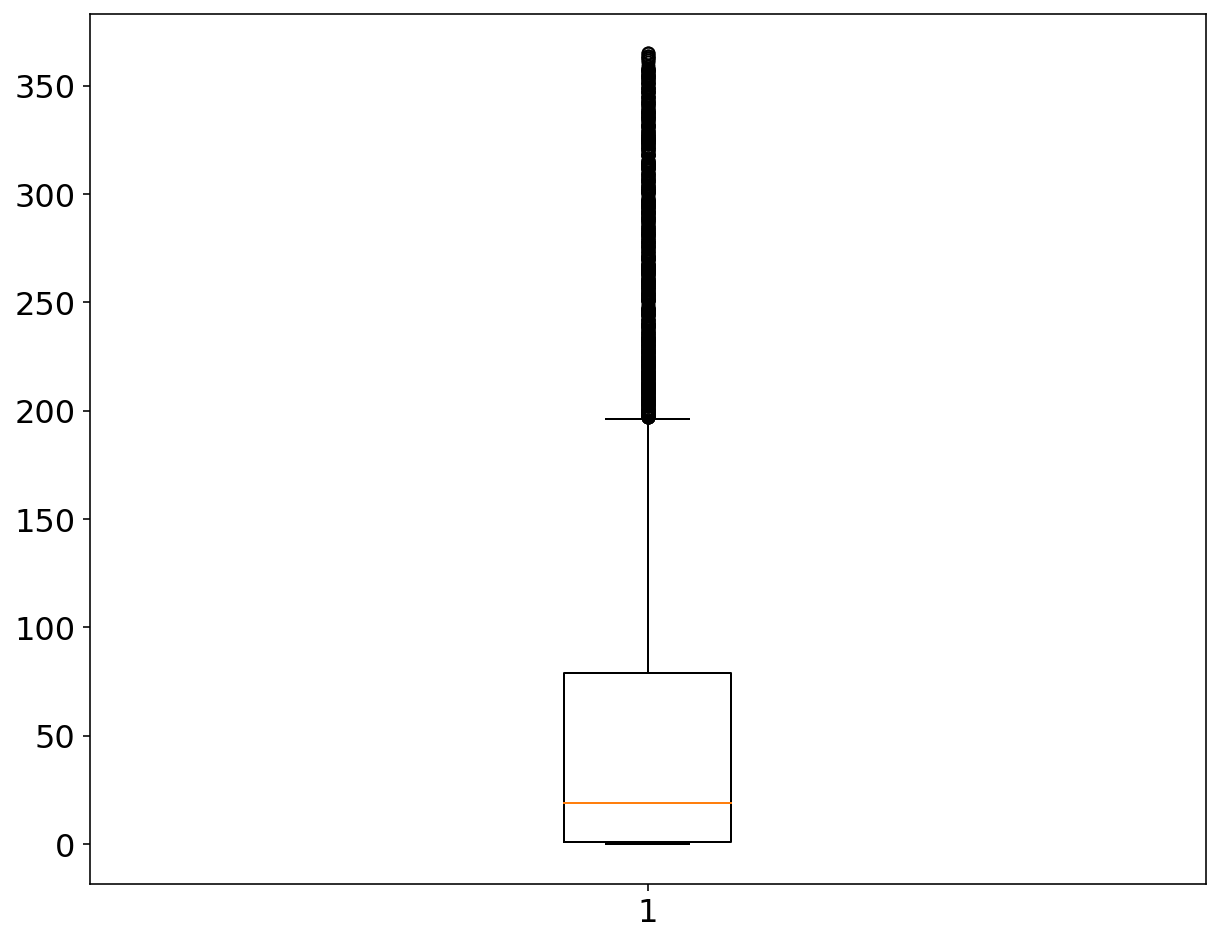

count    6884.000000
mean       57.897734
std        83.381292
min         0.000000
25%         1.000000
50%        19.000000
75%        79.000000
max       365.000000
dtype: float64

In [167]:
# Box plot of gap days from an IP discharge to a psychiatric reshospitalization
matplotlib.rcParams.update({'font.size': 16})
fig = plt.figure()
fig.set_size_inches(10,8)
plt.boxplot(readmission_data)
plt.show()

readmission_data = pd.Series(readmission_data)
readmission_data.describe()

(array([1.571e+03, 4.170e+02, 1.260e+02, 1.220e+02, 9.500e+01, 1.190e+02,
        1.070e+02, 1.110e+02, 9.800e+01, 7.500e+01, 6.900e+01, 5.900e+01,
        7.300e+01, 6.900e+01, 7.800e+01, 6.400e+01, 5.600e+01, 6.100e+01,
        6.400e+01, 6.100e+01, 5.500e+01, 5.200e+01, 4.800e+01, 5.000e+01,
        5.200e+01, 3.900e+01, 4.300e+01, 4.200e+01, 4.200e+01, 4.200e+01,
        3.400e+01, 3.200e+01, 2.600e+01, 2.500e+01, 3.100e+01, 4.700e+01,
        3.100e+01, 3.200e+01, 1.900e+01, 2.700e+01, 2.200e+01, 3.800e+01,
        2.200e+01, 3.000e+01, 2.900e+01, 3.000e+01, 2.600e+01, 2.600e+01,
        2.300e+01, 2.300e+01, 2.200e+01, 2.000e+01, 2.800e+01, 2.500e+01,
        2.800e+01, 2.600e+01, 3.100e+01, 2.600e+01, 2.000e+01, 1.100e+01,
        1.300e+01, 2.300e+01, 3.200e+01, 3.100e+01, 1.500e+01, 1.900e+01,
        1.800e+01, 2.200e+01, 1.700e+01, 2.900e+01, 2.200e+01, 2.400e+01,
        1.900e+01, 2.200e+01, 1.000e+01, 1.200e+01, 1.200e+01, 2.100e+01,
        1.300e+01, 2.200e+01, 1.300e+0

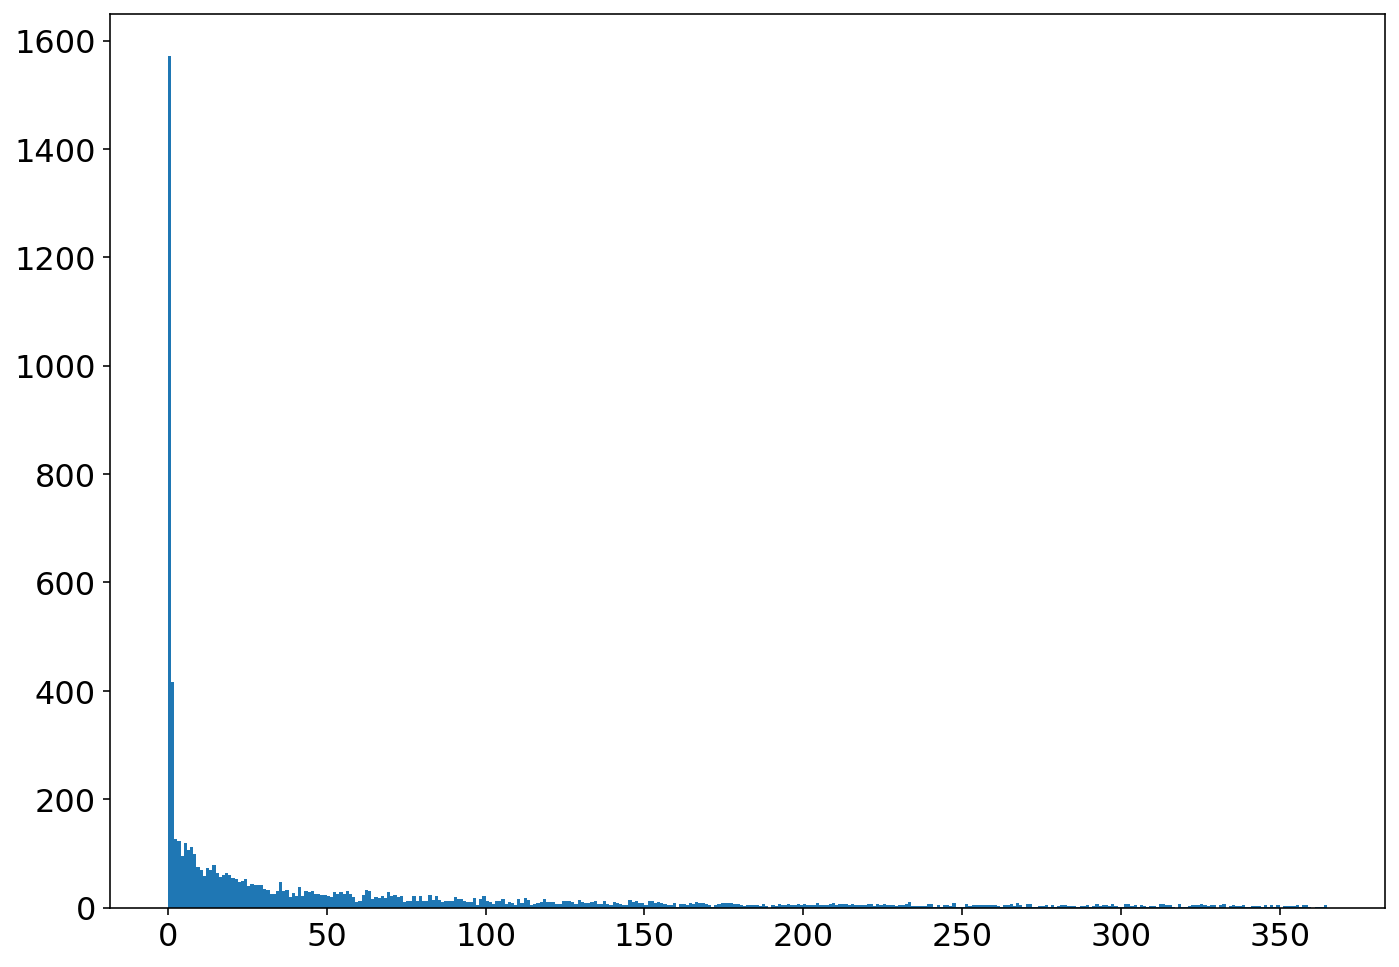

In [168]:

fig, axs = plt.subplots(1, 1, 
                        figsize =(10, 7),  
                        tight_layout = True) 
  
axs.hist(readmission_data, bins = 365) 

### Save the dataset

In [169]:
# Convert the target variables (ip post) to binary
data['svc_CYF_ip_7days_postdc_bi'] = data['svc_ip_7days_postdc']
data['svc_CYF_ip_30days_postdc_bi'] = data['svc_ip_30days_postdc']
data['svc_CYF_ip_60days_postdc_bi'] = data['svc_ip_60days_postdc']
data['svc_CYF_ip_90days_postdc_bi'] = data['svc_ip_90days_postdc']


bi_cols = ['svc_CYF_ip_7days_postdc_bi', 'svc_CYF_ip_30days_postdc_bi', 'svc_CYF_ip_60days_postdc_bi', 'svc_CYF_ip_90days_postdc_bi']
       
for i in bi_cols:
    data.loc[data[i] > 0, i] = 1

Class 0: 8427
Class 1: 5546
Proportion: 1.52 : 1


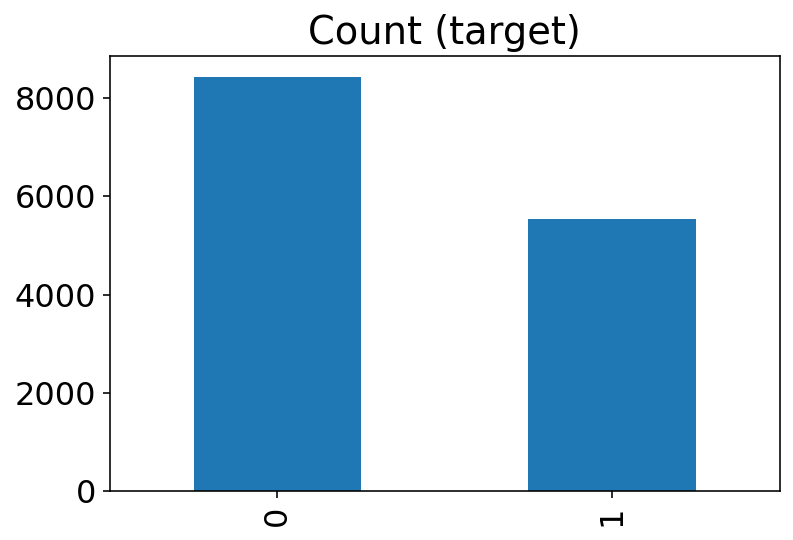

In [170]:
# 90-day readmission data distribution
target_count=data['svc_CYF_ip_90days_postdc_bi'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)')

In [171]:
dist = data[['client_id','svc_CYF_ip_90days_postdc_bi']].groupby('client_id').max().svc_CYF_ip_90days_postdc_bi.value_counts()
dist_perc = data[['client_id','svc_CYF_ip_90days_postdc_bi']].groupby('client_id').max().svc_CYF_ip_90days_postdc_bi.value_counts(normalize=True) * 100
print(dist)
print(dist_perc)

0    4372
1    1961
Name: svc_CYF_ip_90days_postdc_bi, dtype: int64
0    69.035212
1    30.964788
Name: svc_CYF_ip_90days_postdc_bi, dtype: float64


In [186]:
data['svc_CYF_ip_90days_postdc_bi'].groupby([data.fiscal_year, data.client_id]).agg('count')


fiscal_year   client_id
FY 2008-2009  63            2
              249           4
              378           1
              654           8
              815          10
              942           3
              1081          1
              1164          2
              1310          1
              1516          2
              1659          2
              1696          6
              1794          1
              2027          2
              2062          5
              2214          2
              2304          1
              2361          1
              2428          2
              2439          8
              2453          4
              2484          7
              2701          2
              2939          2
              2942          1
              3000          1
              3036          1
              3049          1
              3096          1
              3485          5
              3588          9
              3711          1
              38

Class 0: 8998
Class 1: 4975
Proportion: 1.81 : 1


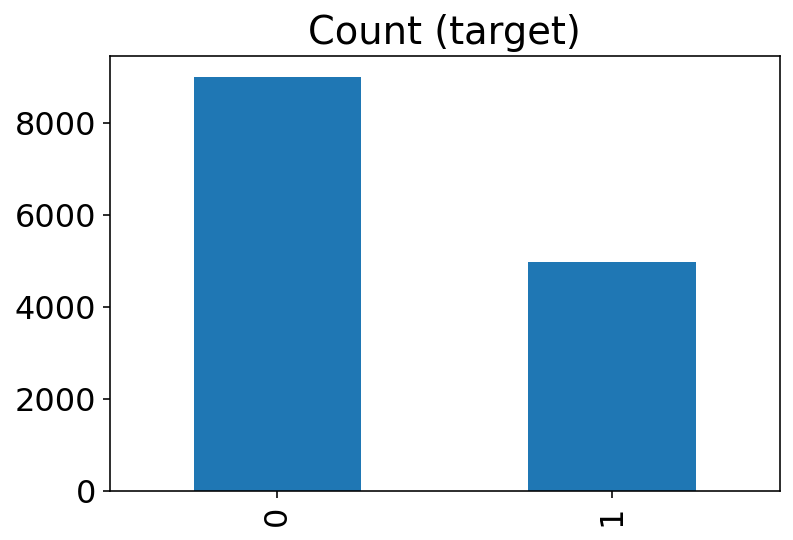

In [172]:
# 60-day readmission data distribution
target_count=data['svc_CYF_ip_60days_postdc_bi'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)')

In [173]:
dist = data[['client_id','svc_CYF_ip_60days_postdc_bi']].groupby('client_id').max().svc_CYF_ip_60days_postdc_bi.value_counts()
dist_perc = data[['client_id','svc_CYF_ip_60days_postdc_bi']].groupby('client_id').max().svc_CYF_ip_60days_postdc_bi.value_counts(normalize=True) * 100
print(dist)
print(dist_perc)

0    4503
1    1830
Name: svc_CYF_ip_60days_postdc_bi, dtype: int64
0    71.103742
1    28.896258
Name: svc_CYF_ip_60days_postdc_bi, dtype: float64


Class 0: 9800
Class 1: 4173
Proportion: 2.35 : 1


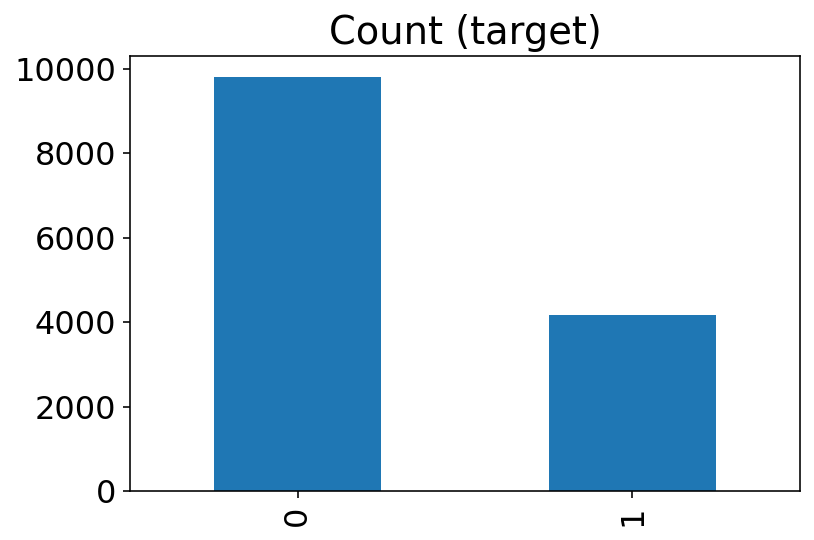

In [174]:
# 30-day readmission data distribution
target_count=data['svc_CYF_ip_30days_postdc_bi'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)')

In [175]:
dist = data[['client_id','svc_CYF_ip_30days_postdc_bi']].groupby('client_id').max().svc_CYF_ip_30days_postdc_bi.value_counts()
dist_perc = data[['client_id','svc_CYF_ip_30days_postdc_bi']].groupby('client_id').max().svc_CYF_ip_30days_postdc_bi.value_counts(normalize=True) * 100
print(dist)
print(dist_perc)

0    4699
1    1634
Name: svc_CYF_ip_30days_postdc_bi, dtype: int64
0    74.198642
1    25.801358
Name: svc_CYF_ip_30days_postdc_bi, dtype: float64


Class 0: 11144
Class 1: 2829
Proportion: 3.94 : 1


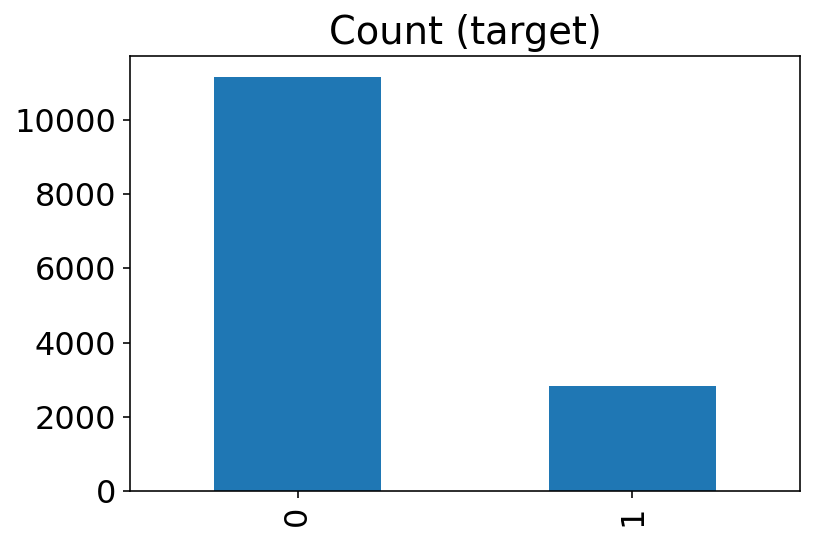

In [176]:
# 7-day readmission data distribution
target_count=data['svc_CYF_ip_7days_postdc_bi'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)')

In [177]:
dist = data[['client_id','svc_CYF_ip_7days_postdc_bi']].groupby('client_id').max().svc_CYF_ip_7days_postdc_bi.value_counts()
dist_perc = data[['client_id','svc_CYF_ip_7days_postdc_bi']].groupby('client_id').max().svc_CYF_ip_7days_postdc_bi.value_counts(normalize=True) * 100
print(dist)
print(dist_perc)

0    5081
1    1252
Name: svc_CYF_ip_7days_postdc_bi, dtype: int64
0    80.230538
1    19.769462
Name: svc_CYF_ip_7days_postdc_bi, dtype: float64


In [178]:
data.to_csv (r'paths_clean_CYF_Data.csv', index = False, header=True)

In [179]:
data.head()

,id,client_id,case_number,assign_id,new,new_3,as_recnum,as_date_opened,as_date_closed,as_date_prev,as_date_next,as_length_IP,as_gap_between_IP,as_pop,as_loc,as_unit,as_subunit,as_name,as_close,svc_pre_all,svc_pre,svc_pre_sub,svc_during,svc_post_sub,svc_post,svc_post_all,svc_op_7days_pre,svc_op_30days_pre,svc_op_60days_pre,svc_op_90days_pre,svc_es_7days_pre,svc_es_30days_pre,svc_es_60days_pre,svc_es_90days_pre,svc_ip_7days_pre,svc_ip_30days_pre,svc_ip_60days_pre,svc_ip_90days_pre,svc_dt_7days_pre,svc_dt_30days_pre,svc_dt_60days_pre,svc_dt_90days_pre,svc_op_7days_postdc,svc_op_30days_postdc,svc_op_60days_postdc,svc_op_90days_postdc,svc_es_7days_postdc,svc_es_30days_postdc,svc_es_60days_postdc,svc_es_90days_postdc,svc_ip_7days_postdc,svc_ip_30days_postdc,svc_ip_60days_postdc,svc_ip_90days_postdc,svc_dt_7days_postdc,svc_dt_30days_postdc,svc_dt_60days_postdc,svc_dt_90days_postdc,loc_pre_7days_ACT,loc_pre_30days_ACT,loc_pre_60days_ACT,loc_pre_90days_ACT,loc_pre_7days_CM,loc_pre_30days_CM,loc_pre_60days_CM,loc_pre_90days_CM,loc_pre_7days_CMINST,loc_pre_30days_CMINST,loc_pre_60days_CMINST,loc_pre_90days_CMINST,loc_pre_7days_CMSTR,loc_pre_30days_CMSTR,loc_pre_60days_CMSTR,loc_pre_90days_CMSTR,loc_pre_7days_CMTRAN,loc_pre_30days_CMTRAN,loc_pre_60days_CMTRAN,loc_pre_90days_CMTRAN,loc_pre_7days_WRAP,loc_pre_30days_WRAP,loc_pre_60days_WRAP,loc_pre_90days_WRAP,loc_pre_7days_TBS,loc_pre_30days_TBS,loc_pre_60days_TBS,loc_pre_90days_TBS,loc_pre_7days_FFS,loc_pre_30days_FFS,loc_pre_60days_FFS,loc_pre_90days_FFS,loc_pre_7days_OP,loc_pre_30days_OP,loc_pre_60days_OP,loc_pre_90days_OP,loc_pre_7days_OPLIHP,loc_pre_30days_OPLIHP,loc_pre_60days_OPLIHP,loc_pre_90days_OPLIHP,loc_pre_7days_OPR,loc_pre_30days_OPR,loc_pre_60days_OPR,loc_pre_90days_OPR,loc_pre_7days_PREV,loc_pre_30days_PREV,loc_pre_60days_PREV,loc_pre_90days_PREV,loc_pre_7days_CO,loc_pre_30days_CO,loc_pre_60days_CO,loc_pre_90days_CO,loc_pre_7days_CR,loc_pre_30days_CR,loc_pre_60days_CR,loc_pre_90days_CR,loc_pre_7days_CS,loc_pre_30days_CS,loc_pre_60days_CS,loc_pre_90days_CS,loc_pre_7days_ESU,loc_pre_30days_ESU,loc_pre_60days_ESU,loc_pre_90days_ESU,loc_pre_7days_PERT,loc_pre_30days_PERT,loc_pre_60days_PERT,loc_pre_90days_PERT,loc_pre_7days_UO,loc_pre_30days_UO,loc_pre_60days_UO,loc_pre_90days_UO,loc_pre_7days_IP,loc_pre_30days_IP,loc_pre_60days_IP,loc_pre_90days_IP,loc_pre_7days_IPCAPS,loc_pre_30days_IPCAPS,loc_pre_60days_IPCAPS,loc_pre_90days_IPCAPS,loc_pre_7days_IPCNTY,loc_pre_30days_IPCNTY,loc_pre_60days_IPCNTY,loc_pre_90days_IPCNTY,loc_pre_7days_IPFFS,loc_pre_30days_IPFFS,loc_pre_60days_IPFFS,loc_pre_90days_IPFFS,loc_pre_7days_IPLIHP,loc_pre_30days_IPLIHP,loc_pre_60days_IPLIHP,loc_pre_90days_IPLIHP,loc_pre_7days_IPST,loc_pre_30days_IPST,loc_pre_60days_IPST,loc_pre_90days_IPST,loc_pre_7days_JAIL,loc_pre_30days_JAIL,loc_pre_60days_JAIL,loc_pre_90days_JAIL,loc_pre_7days_JFS,loc_pre_30days_JFS,loc_pre_60days_JFS,loc_pre_90days_JFS,loc_pre_7days_EDG,loc_pre_30days_EDG,loc_pre_60days_EDG,loc_pre_90days_EDG,loc_pre_7days_LTC,loc_pre_30days_LTC,loc_pre_60days_LTC,loc_pre_90days_LTC,loc_pre_7days_LTCINST,loc_pre_30days_LTCINST,loc_pre_60days_LTCINST,loc_pre_90days_LTCINST,loc_pre_7days_LTCRES,loc_pre_30days_LTCRES,loc_pre_60days_LTCRES,loc_pre_90days_LTCRES,loc_pre_7days_RES,loc_pre_30days_RES,loc_pre_60days_RES,loc_pre_90days_RES,loc_pre_7days_BHC,loc_pre_30days_BHC,loc_pre_60days_BHC,loc_pre_90days_BHC,loc_pre_7days_DTC,loc_pre_30days_DTC,loc_pre_60days_DTC,loc_pre_90days_DTC,loc_pre_7days_DTCTF,loc_pre_30days_DTCTF,loc_pre_60days_DTCTF,loc_pre_90days_DTCTF,loc_pre_7days_DTR,loc_pre_30days_DTR,loc_pre_60days_DTR,loc_pre_90days_DTR,loc_pre_7days_STRTP,loc_pre_30days_STRTP,loc_pre_60days_STRTP,loc_pre_90days_STRTP,loc_post_7days_ACT,loc_post_30days_ACT,loc_post_60days_ACT,loc_post_90days_ACT,loc_post_7days_CM,loc_post_30days_CM,loc_post_60days_CM,loc_post_90days_CM,loc_post_7days_CMINST,loc_post_30days_CMINST,loc_post_60days_CMINST,loc_post_90days_CMINST,loc_post_7days_CMSTR,loc_post_30days_CMSTR,l

## Recycle codes

In [ ]:

'''
# Convert 7/30/60/90 op, es, ip to binary
bi_cols = ['svc_AOA_op_7days_pre', 'svc_AOA_op_30days_pre', 'svc_AOA_op_60days_pre', 'svc_AOA_op_90days_pre',
           'svc_AOA_es_7days_pre', 'svc_AOA_es_30days_pre', 'svc_AOA_es_60days_pre', 'svc_AOA_es_90days_pre', 
           'svc_AOA_fs_7days_pre', 'svc_AOA_fs_30days_pre', 'svc_AOA_fs_60days_pre', 'svc_AOA_fs_90days_pre', 
           'svc_AOA_24h_7days_pre', 'svc_AOA_24h_30days_pre', 'svc_AOA_24h_60days_pre', 'svc_AOA_24h_90days_pre', 
           'svc_AOA_ip_7days_pre', 'svc_AOA_ip_30days_pre', 'svc_AOA_ip_60days_pre', 'svc_AOA_ip_90days_pre',
           'svc_AOA_op_7days_postdc', 'svc_AOA_op_30days_postdc', 'svc_AOA_op_60days_postdc', 'svc_AOA_op_90days_postdc',
           'svc_AOA_es_7days_postdc', 'svc_AOA_es_30days_postdc', 'svc_AOA_es_60days_postdc', 'svc_AOA_es_90days_postdc', 
           'svc_AOA_fs_7days_postdc', 'svc_AOA_fs_30days_postdc', 'svc_AOA_fs_60days_postdc', 'svc_AOA_fs_90days_postdc', 
           'svc_AOA_24h_7days_postdc', 'svc_AOA_24h_30days_postdc', 'svc_AOA_24h_60days_postdc', 'svc_AOA_24h_90days_postdc', 
           'svc_AOA_ip_7days_postdc', 'svc_AOA_ip_30days_postdc', 'svc_AOA_ip_60days_postdc', 'svc_AOA_ip_90days_postdc']
       
for i in bi_cols:
    data.loc[data[i] > 0, i] = 1
'''

In [ ]:
'''
# Recode certian variables
# recode gender
data['gender'] = data['gender'].replace(['Other/Unknwon','Another Gender Identity','Transgender','Decline to state','Questioning/Unsure','Genderqueer'],'Other/Unknown')

# recode dx
data['dx_group'] = data['dx_group'].replace(['Excluded','Invalid'],'Excluded/Invalid')

# recode language
data['lang'] = data['lang'].replace(['Other Asian','Vietnamese', 'Tagalog'],'Asian languages')
data['lang'] = data['lang'].replace(['Arabic','Farsi', 'Other Middle Eastern'],'Middle Eastern languages')

# recode insurance type
data['insurance'] = data['insurance'].replace(['Medi-Cal + Medicare','Medi-Cal Only', 'Medicare Only'],'Medi-Cal')

# recode sexual orientation
data['sexorient'] = data['sexorient'].replace(['Bisexual','Gay Male', 'Other', 'Lesbian', 'Questioning', 'Transgender'],'LGBTQ+')
data['sexorient'] = data['sexorient'].replace(['Decline to State'],'Missing')

# recode employment status
data['emp'] = data['emp'].replace(['Not Seeking Work','Seeking Work'],'Unemployed')
data['emp'] = data['emp'].replace(['Other','Unknown'],'Other/Unknown')

# recode living situation
data['liv'] = data['liv'].replace(['N'],'Other/Unknown')
'''

In [ ]:
'''
# Substract one from all IP pre loc
data['loc_pre_90days_IP'] = data['loc_pre_90days_IP'] - 1
data['loc_pre_90days_IPCNTY'] = data['loc_pre_90days_IPCNTY'] - 1
data['loc_pre_90days_IPFFS'] = data['loc_pre_90days_IPFFS'] - 1
data['loc_pre_90days_IPST'] = data['loc_pre_90days_IPST'] - 1
data['loc_pre_90days_IPCAPS'] = data['loc_pre_90days_IPCAPS'] - 1


data['loc_pre_90days_IP'] = data['loc_pre_90days_IP'].clip(lower=0)
data['loc_pre_90days_IPCNTY'] = data['loc_pre_90days_IPCNTY'].clip(lower=0)
data['loc_pre_90days_IPFFS'] = data['loc_pre_90days_IPFFS'].clip(lower=0)
data['loc_pre_90days_IPST'] = data['loc_pre_90days_IPST'].clip(lower=0)
data['loc_pre_90days_IPCAPS'] = data['loc_pre_90days_IPCAPS'].clip(lower=0)

data['svc_AOA_ip_90days_pre'] = data['loc_pre_90days_IP'] + data['loc_pre_90days_IPCNTY'] + data['loc_pre_90days_IPFFS'] + data['loc_pre_90days_IPST'] 
'''

In [ ]:
# Calculate IP length
#data['as_length_IP'] =  (data.as_date_closed - data.as_date_opened)
#data['as_length_IP'] = data['as_length_IP'] / np.timedelta64(1, 'D')
#data['as_length_IP'] = data.IP_length.clip(lower=0)

# Calculate the gap between the current IP to the next IP
#data['IP_gap_next_IP'] =  (data.as_date_next - data.as_date_closed)
#data['IP_gap_next_IP'] = data['IP_gap_next_IP'] / np.timedelta64(1, 'D')


In [ ]:
#data['educ'].fillna("Unknown/Not Reported", inplace = True)

In [ ]:
#loc_post_IP_client = data[['client_id','loc_post_IP_total']].groupby('client_id').max()
#print("Number of rehospitalization cases:", np.count_nonzero(data['loc_post_IP_total']))
#print("Number of clients with rehospitalization:", np.count_nonzero(loc_post_IP_client['loc_post_IP_total']))
# number of IP servicecs readmission
#data[['client_id','loc_post_IP_total']].groupby('client_id').max().describe()

In [ ]:
'''
# Number of OP service 
OP_7_pre_dist_perc = data[['client_id','svc_op_7days_pre']].groupby('client_id').max().svc_op_7days_pre.value_counts(normalize=True) * 100
OP_30_pre_dist_perc = data[['client_id','svc_op_30days_pre']].groupby('client_id').max().svc_op_30days_pre.value_counts(normalize=True) * 100
OP_60_pre_dist_perc = data[['client_id','svc_op_60days_pre']].groupby('client_id').max().svc_op_60days_pre.value_counts(normalize=True) * 100
OP_90_pre_dist_perc = data[['client_id','svc_op_90days_pre']].groupby('client_id').max().svc_op_90days_pre.value_counts(normalize=True) * 100

OP_7_post_dist_perc = data[['client_id','svc_op_7days_postdc']].groupby('client_id').max().svc_op_7days_postdc.value_counts(normalize=True) * 100
OP_30_post_dist_perc = data[['client_id','svc_op_30days_postdc']].groupby('client_id').max().svc_op_30days_postdc.value_counts(normalize=True) * 100
OP_60_post_dist_perc = data[['client_id','svc_op_60days_postdc']].groupby('client_id').max().svc_op_60days_postdc.value_counts(normalize=True) * 100
OP_90_post_dist_perc = data[['client_id','svc_op_90days_postdc']].groupby('client_id').max().svc_op_90days_postdc.value_counts(normalize=True) * 100

print("7 days before an IP index:", OP_7_pre_dist_perc[1])
print("30 days before an IP index:", OP_30_pre_dist_perc[1])
print("60 days before an IP index:", OP_60_pre_dist_perc[1])
print("90 days before an IP index:", OP_90_pre_dist_perc[1])

print("7 days after an IP discharge:", OP_7_post_dist_perc[1])
print("30 days after an IP discharge:", OP_30_post_dist_perc[1])
print("60 days after an IP discharge:", OP_60_post_dist_perc[1])
print("90 days after an IP discharge:", OP_90_post_dist_perc[1])
'''

In [ ]:
'''
# Number of ES service 
ES_7_pre_dist_perc = data[['client_id','svc_es_7days_pre']].groupby('client_id').max().svc_es_7days_pre.value_counts(normalize=True) * 100
ES_30_pre_dist_perc = data[['client_id','svc_es_30days_pre']].groupby('client_id').max().svc_es_30days_pre.value_counts(normalize=True) * 100
ES_60_pre_dist_perc = data[['client_id','svc_es_60days_pre']].groupby('client_id').max().svc_es_60days_pre.value_counts(normalize=True) * 100
ES_90_pre_dist_perc = data[['client_id','svc_es_90days_pre']].groupby('client_id').max().svc_es_90days_pre.value_counts(normalize=True) * 100

ES_7_post_dist_perc = data[['client_id','svc_es_7days_postdc']].groupby('client_id').max().svc_es_7days_postdc.value_counts(normalize=True) * 100
ES_30_post_dist_perc = data[['client_id','svc_es_30days_postdc']].groupby('client_id').max().svc_es_30days_postdc.value_counts(normalize=True) * 100
ES_60_post_dist_perc = data[['client_id','svc_es_60days_postdc']].groupby('client_id').max().svc_es_60days_postdc.value_counts(normalize=True) * 100
ES_90_post_dist_perc = data[['client_id','svc_es_90days_postdc']].groupby('client_id').max().svc_es_90days_postdc.value_counts(normalize=True) * 100

print("7 days before an IP index:", ES_7_pre_dist_perc[1])
print("30 days before an IP index:", ES_30_pre_dist_perc[1])
print("60 days before an IP index:", ES_30_pre_dist_perc[1])
print("90 days before an IP index:", ES_90_pre_dist_perc[1])

print("7 days after an IP discharge:", ES_7_post_dist_perc[1])
print("30 days after an IP discharge:", ES_30_post_dist_perc[1])
print("60 days after an IP discharge:", ES_60_post_dist_perc[1])
print("90 days after an IP discharge:", ES_90_post_dist_perc[1])
'''

In [ ]:
'''
# Number of IP service 
IP_7_pre_dist_perc = data[['client_id','svc_ip_7days_pre']].groupby('client_id').max().svc_ip_7days_pre.value_counts(normalize=True) * 100
IP_30_pre_dist_perc = data[['client_id','svc_ip_30days_pre']].groupby('client_id').max().svc_ip_30days_pre.value_counts(normalize=True) * 100
IP_60_pre_dist_perc = data[['client_id','svc_ip_60days_pre']].groupby('client_id').max().svc_ip_60days_pre.value_counts(normalize=True) * 100
IP_90_pre_dist_perc = data[['client_id','svc_ip_90days_pre']].groupby('client_id').max().svc_ip_90days_pre.value_counts(normalize=True) * 100

IP_7_post_dist_perc = data[['client_id','svc_ip_7days_postdc']].groupby('client_id').max().svc_ip_7days_postdc.value_counts(normalize=True) * 100
IP_30_post_dist_perc = data[['client_id','svc_ip_30days_postdc']].groupby('client_id').max().svc_ip_30days_postdc.value_counts(normalize=True) * 100
IP_60_post_dist_perc = data[['client_id','svc_ip_60days_postdc']].groupby('client_id').max().svc_ip_60days_postdc.value_counts(normalize=True) * 100
IP_90_post_dist_perc = data[['client_id','svc_ip_90days_postdc']].groupby('client_id').max().svc_ip_90days_postdc.value_counts(normalize=True) * 100

print("7 days before an IP index:", IP_7_pre_dist_perc[1])
print("30 days before an IP index:", IP_30_pre_dist_perc[1])
print("60 days before an IP index:", IP_60_pre_dist_perc[1])
print("90 days before an IP index:", IP_90_pre_dist_perc[1])

print("7 days after an IP discharge:", IP_7_post_dist_perc[1])
print("30 days after an IP discharge:", IP_30_post_dist_perc[1])
print("60 days after an IP discharge:", IP_60_post_dist_perc[1])
print("90 days after an IP discharge:", IP_90_post_dist_perc[1])
'''

In [ ]:
#df_loc = data.iloc[:, 43:183]
#pd.set_option('display.max_columns', 140)
#df_loc.describe(include = 'all')

In [ ]:
# Excluding cases that have more than one year in IP
#data = data.query('as_length_IP <= 365') 

In [ ]:
#data.as_gap_between_IP = data.as_date_next - data.as_date_closed
#data['as_gap_between_IP']=data['as_gap_between_IP']/np.timedelta64(1,'D')
#data['as_gap_between_IP'] = data['as_gap_between_IP'].fillna(value=0)

In [ ]:
#data.drop('fical_year',axis=1, inplace=True)


In [ ]:
'''
# Create the target column and dataset
data_90 = data
data_90['output'] = data_90['svc_AOA_ip_90days_postdc_bi']
data_60 = data
data_60['output'] = data_60['svc_AOA_ip_60days_postdc_bi']
data_30 = data
data_30['output'] = data_30['svc_AOA_ip_30days_postdc_bi']
data_7 = data
data_7['output'] = data_7['svc_AOA_ip_7days_postdc_bi']

data_30.to_csv (r'paths_clean_30.csv', index = False, header=True)
data_90.to_csv (r'paths_clean_90.csv', index = False, header=True)
data_60.to_csv (r'paths_clean_60.csv', index = False, header=True)
data_7.to_csv (r'paths_clean_7.csv', index = False, header=True)
'''